In [40]:
#!pip install streamlit
#!pip install joblib

## 1. Préparation de l'environnement de travail

In [760]:
#import the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#set the backgroung style sheet
sns.set_style("whitegrid")
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
from plotly.graph_objs import Scatter, Layout
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import joblib


## 2. Description des données
L'ensemble de données utilisé dans cette étude contiennent des informations sur différents traits de personnalité et les habitudes de consommation de diverses substances. Il comprend des caractéristiques telles que l’âge, le sexe, l’éducation et des scores de personnalité spécifiques, ainsi que des données sur la consommation de drogues.


In [761]:
data = 'drug_consumption.data'

In [762]:
# Define the column names based on the additional information you provided
column_names = ["ID", "Age", "Gender", "Education", "Country", "Ethnicity",
                "Nscore", "Escore", "Oscore", "Ascore", "Cscore",
                "Impulsive", "SS",
                "Alcohol", "Amphet", "Amyl", "Benzos", "Caff",
                "Cannabis", "Choc", "Coke", "Crack", "Ecstasy",
                "Heroin", "Ketamine", "Legalh", "LSD", "Meth",
                "Mushrooms", "Nicotine", "Semer", "VSA"]

# Load the data
data = pd.read_csv('drug_consumption.data', header=None, names=column_names)

# Display the first few rows of the dataframe
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [763]:
# Mapping for each column
age_map = {-0.95197: "18-24", -0.07854: "25-34", 0.49788: "35-44", 1.09449: "45-54", 1.82213: "55-64", 2.59171: "65+"}
gender_map = {0.48246: "Female", -0.48246: "Male"}
education_map = {-2.43591: "Left school before 16 years", -1.73790: "Left school at 16 years", -1.43719: "Left school at 17 years", -1.22751: "Left school at 18 years", -0.61113: "Some college or university, no certificate or degree", -0.05921: "Professional certificate/ diploma", 0.45468: "University degree", 1.16365: "Masters degree", 1.98437: "Doctorate degree"}
country_map = {-0.09765: "Australia", 0.24923: "Canada", -0.46841: "New Zealand", -0.28519: "Other", 0.21128: "Republic of Ireland", 0.96082: "UK", -0.57009: "USA"}
ethnicity_map = {-0.50212: "Asian", -1.10702: "Black", 1.90725: "Mixed-Black/Asian", 0.12600: "Mixed-White/Asian", -0.22166: "Mixed-White/Black", 0.11440: "Other", -0.31685: "White"}
nscore_map = {-3.46436: 12, -3.15735: 13, -2.75696: 14, -2.52197: 15, -2.42317: 16, -2.34360: 17, -2.21844: 18, -2.05048: 19, -1.86962: 20, -1.69163: 21, -1.55078: 22, -1.43907: 23, -1.32828: 24, -1.19430: 25, -1.05308: 26, -0.92104: 27, -0.79151: 28, -0.67825: 29, -0.58016: 30, -0.46725: 31, -0.34799: 32, -0.24649: 33, -0.14882: 34, -0.05188: 35, 0.04257: 36, 0.13606: 37, 0.22393: 38, 0.31287: 39, 0.41667: 40, 0.52135: 41, 0.62967: 42, 0.73545: 43, 0.82562: 44, 0.91093: 45, 1.02119: 46, 1.13281: 47, 1.23461: 48, 1.37297: 49, 1.49158: 50, 1.60383: 51, 1.72012: 52, 1.83990: 53, 1.98437: 54, 2.12700: 55, 2.28554: 56, 2.46262: 57, 2.61139: 58, 2.82196: 59, 3.27393: 60}
escore_map = {-3.27393: 16, -3.00537: 18, -2.72827: 19, -2.53830: 20, -2.44904: 21, -2.32338: 22, -2.21069: 23, -2.11437: 24, -2.03972: 25, -1.92173: 26, -1.76250: 27, -1.63340: 28, -1.50796: 29, -1.37639: 30, -1.23177: 31, -1.09207: 32, -0.94779: 33, -0.80615: 34, -0.69509: 35, -0.57545: 36, -0.43999: 37, -0.30033: 38, -0.15487: 39, 0.00332: 40, 0.16767: 41, 0.32197: 42, 0.47617: 43, 0.63779: 44, 0.80523: 45, 0.96248: 46, 1.11406: 47, 1.28610: 48, 1.45421: 49, 1.58487: 50, 1.74091: 51, 1.93886: 52, 2.12700: 53, 2.32338: 54, 2.57309: 55, 2.85950: 56, 3.00537: 58, 3.27393: 59}
oscore_mapping = {v[1]: v[0] for v in [(24, -3.27393), (26, -2.85950), (28, -2.63199), (29, -2.39883), (30, -2.21069), (31, -2.09015), (32, -1.97495), (33, -1.82919), (34, -1.68062), (35, -1.55521), (36, -1.42424), (37, -1.27553), (38, -1.11902), (39, -0.97631), (40, -0.84732), (41, -0.71727), (42, -0.58331), (43, -0.45174), (44, -0.31776), (45, -0.17779), (46, -0.01928), (47, 0.14143), (48, 0.29338), (49, 0.44585), (50, 0.58331), (51, 0.72330), (52, 0.88309), (53, 1.06238), (54, 1.24033), (55, 1.43533), (56, 1.65653), (57, 1.88511), (58, 2.15324), (59, 2.44904), (60, 2.90161)]}
cscore_mapping = {v[1]: v[0] for v in [(17, -3.46436), (19, -3.15735), (20, -2.90161), (21, -2.72827), (22, -2.57309), (23, -2.42317), (24, -2.30408), (25, -2.18109), (26, -2.04506), (27, -1.92173), (28, -1.78169), (29, -1.64101), (30, -1.51840), (31, -1.38502), (32, -1.25773), (33, -1.13788), (34, -1.01450), (35, -0.89891), (36, -0.78155), (37, -0.65253), (38, -0.52745), (39, -0.40581), (40, -0.27607), (41, -0.14277), (42, -0.00665), (43, 0.12331), (44, 0.25953), (45, 0.41594), (46, 0.58489), (47, 0.7583), (48, 0.93949), (49, 1.13407), (50, 1.30612), (51, 1.46191), (52, 1.63088), (53, 1.81175), (54, 2.04506), (55, 2.33337), (56, 2.63199), (57, 3.00537), (59, 3.46436)]}
ascore_mapping = {-3.46436: 12, -3.15735: 16, -3.00537: 18, -2.90161: 23, -2.78793: 24, -2.70172: 25, -2.53830: 26, -2.35413: 27, -2.21844: 28, -2.07848: 29, -1.92595: 30, -1.77200: 31, -1.62090: 32, -1.47955: 33, -1.34289: 34, -1.21213: 35, -1.07533: 36, -0.91699: 37, -0.76096: 38, -0.60633: 39, -0.45321: 40, -0.30172: 41, -0.15487: 42, -0.01729: 43, 0.13136: 44, 0.28783: 45, 0.43852: 46, 0.59042: 47, 0.76096: 48, 0.94156: 49, 1.11406: 50, 1.28610: 51, 1.45039: 52, 1.61108: 53, 1.81866: 54, 2.03972: 55, 2.23427: 56, 2.46262: 57, 2.75696: 58, 3.15735: 59, 3.46436: 60}
ss_mapping = {-2.07848: 3.77, -1.54858: 4.62, -1.18084: 7.00, -0.84637: 8.97, -0.52593: 11.19, -0.21575: 11.83, 0.07987: 11.62, 0.40148: 13.21, 0.76540: 11.19, 1.22470: 11.14, 1.92173: 5.46}
impulsive_mapping = {-2.55524: 1.06, -1.37983: 14.64, -0.71126: 16.29, -0.21712: 18.83, 0.19268: 13.63, 0.52975: 11.46, 0.88113: 10.34, 1.29221: 7.85, 1.86203: 5.52, 2.90161: 0.37}
alcohol_mapping, amphet_mapping, amyl_mapping, benzos_mapping = {"CL0": 1.80, "CL1": 1.80, "CL2": 3.61, "CL3": 10.50, "CL4": 15.23, "CL5": 40.27, "CL6": 26.79}, {"CL0": 51.78, "CL1": 12.20, "CL2": 12.89, "CL3": 10.50, "CL4": 3.98, "CL5": 3.24, "CL6": 5.41}, {"CL0": 69.23, "CL1": 11.14, "CL2": 12.57, "CL3": 4.88, "CL4": 1.27, "CL5": 0.74, "CL6": 0.16}, {"CL0": 53.05, "CL1": 6.15, "CL2": 12.41, "CL3": 12.52, "CL4": 6.37, "CL5": 4.46, "CL6": 5.04}
ss_mapping = {-2.07848: 3.77, -1.54858: 4.62, -1.18084: 7.00, -0.84637: 8.97, -0.52593: 11.19, -0.21575: 11.83, 0.07987: 11.62, 0.40148: 13.21, 0.76540: 11.19, 1.22470: 11.14, 1.92173: 5.46}
caff_mapping, cannabis_mapping, choc_mapping, coke_mapping = {"CL0": 1.43, "CL1": 0.53, "CL2": 1.27, "CL3": 3.18, "CL4": 5.62, "CL5": 14.48, "CL6": 73.47}, {"CL0": 21.91, "CL1": 10.98, "CL2": 14.11, "CL3": 11.19, "CL4": 7.43, "CL5": 9.81, "CL6": 24.56}, {"CL0": 1.70, "CL1": 0.16, "CL2": 0.53, "CL3": 2.86, "CL4": 15.70, "CL5": 36.23, "CL6": 42.81}, {"CL0": 55.07, "CL1": 8.49, "CL2": 14.32, "CL3": 13.69, "CL4": 5.25, "CL5": 2.18, "CL6": 1.01}
crack_mapping, ecstasy_mapping, heroin_mapping, ketamine_mapping = {"CL0": 86.31, "CL1": 3.55, "CL2": 5.94, "CL3": 3.13, "CL4": 0.48, "CL5": 0.48, "CL6": 0.11}, {"CL0": 54.16, "CL1": 5.99, "CL2": 12.41, "CL3": 14.69, "CL4": 8.28, "CL5": 3.34, "CL6": 1.11}, {"CL0": 85.15, "CL1": 3.61, "CL2": 4.99, "CL3": 3.45, "CL4": 1.27, "CL5": 0.85, "CL6": 0.69}, {"CL0": 79.05, "CL1": 2.39, "CL2": 7.53, "CL3": 6.84, "CL4": 2.23, "CL5": 1.75, "CL6": 0.21}
legalh_mapping, lsd_mapping, meth_mapping, mushrooms_mapping = {"CL0": 58.04, "CL1": 1.54, "CL2": 10.50, "CL3": 17.14, "CL4": 5.84, "CL5": 3.40, "CL6": 3.55}, {"CL0": 56.71, "CL1": 13.74, "CL2": 9.39, "CL3": 11.35, "CL4": 5.15, "CL5": 2.97, "CL6": 0.69}, {"CL0": 75.81, "CL1": 2.07, "CL2": 5.15, "CL3": 7.90, "CL4": 2.65, "CL5": 2.55, "CL6": 3.87}, {"CL0": 52.10, "CL1": 11.09, "CL2": 13.79, "CL3": 14.59, "CL4": 6.10, "CL5": 2.12, "CL6": 0.21}
nicotine_mapping, semer_mapping, vsa_mapping = {"CL0": 22.71, "CL1": 10.24, "CL2": 10.82, "CL3": 9.81, "CL4": 5.73, "CL5": 8.33, "CL6": 32.36}, {"CL0": 99.58, "CL1": 0.11, "CL2": 0.16, "CL3": 0.11, "CL4": 0.05, "CL5": 0.00, "CL6": 0.00}, {"CL0": 77.19, "CL1": 10.61, "CL2": 7.16, "CL3": 3.24, "CL4": 0.69, "CL5": 0.74, "CL6": 0.37}


# Apply the mappings
data["Age"] = data["Age"].map(age_map)
data["Gender"] = data["Gender"].map(gender_map)
data["Education"] = data["Education"].map(education_map)
data["Country"] = data["Country"].map(country_map)
data["Ethnicity"] = data["Ethnicity"].map(ethnicity_map)
data["Nscore"] = data["Nscore"].map(nscore_map)
data['Escore'] = data['Escore'].map(escore_map)
data["Oscore"] = data["Oscore"].map(oscore_mapping)
data["Cscore"]=data["Cscore"].map(cscore_mapping)
data["Ascore"]=data["Ascore"].map(ascore_mapping)
data['Impulsive'] = data['Impulsive'].map(impulsive_mapping)
data['SS'] = data['SS'].map(ss_mapping)


# Display the first few rows to verify
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,39,36,42,37,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,Male,Doctorate degree,UK,White,29,52,55,48,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,Male,Professional certificate/ diploma,UK,White,31,45,40,32,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,Masters degree,UK,White,34,34,46,47,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,Female,Doctorate degree,UK,White,43,28,43,41,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [764]:
data.to_csv('drug_consumptioncleaned.csv', index=False)

In [765]:
data['Alcohol'] = data['Alcohol'].map(alcohol_mapping)
data['Amphet'] = data['Amphet'].map(amphet_mapping)
data['Amyl'] = data['Amyl'].map(amyl_mapping)
data['Benzos'] = data['Benzos'].map(benzos_mapping)
data['Caff'] = data['Caff'].map(caff_mapping)
data['Cannabis'] = data['Cannabis'].map(cannabis_mapping)
data['Choc'] = data['Choc'].map(choc_mapping)
data['Coke'] = data['Coke'].map(coke_mapping)
data['Crack'] = data['Crack'].map(crack_mapping)
data['Ecstasy'] = data['Ecstasy'].map(ecstasy_mapping)
data['Heroin'] = data['Heroin'].map(heroin_mapping)
data['Ketamine'] = data['Ketamine'].map(ketamine_mapping)
data['Legalh'] = data['Legalh'].map(legalh_mapping)
data['LSD'] = data['LSD'].map(lsd_mapping)
data['Meth'] = data['Meth'].map(meth_mapping)
data['Mushrooms'] = data['Mushrooms'].map(mushrooms_mapping)
data['Nicotine'] = data['Nicotine'].map(nicotine_mapping)
data['Semer'] = data['Semer'].map(semer_mapping)
data['VSA'] = data['VSA'].map(vsa_mapping)

# Display the first few rows to verify
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,39,36,42,37,...,54.16,85.15,79.05,58.04,56.71,75.81,52.10,10.82,99.58,77.19
1,2,25-34,Male,Doctorate degree,UK,White,29,52,55,48,...,8.28,85.15,7.53,58.04,9.39,7.90,52.10,5.73,99.58,77.19
2,3,35-44,Male,Professional certificate/ diploma,UK,White,31,45,40,32,...,54.16,85.15,79.05,58.04,56.71,75.81,11.09,22.71,99.58,77.19
3,4,18-24,Female,Masters degree,UK,White,34,34,46,47,...,54.16,85.15,7.53,58.04,56.71,75.81,52.10,10.82,99.58,77.19
4,5,35-44,Female,Doctorate degree,UK,White,43,28,43,41,...,5.99,85.15,79.05,1.54,56.71,75.81,13.79,10.82,99.58,77.19


## 3. Premier nettoyage et préparation des données

Nettoyage des données (traitement des valeurs manquantes, filtrage, etc.).
Transformation des données nécessaire

In [766]:
# Chargement du fichier de données
file_path = 'drug_consumptioncleaned.csv'
new_data = pd.read_csv(file_path)

# Affichage des premières lignes pour avoir un aperçu des données
new_data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,39,36,42,37,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,Male,Doctorate degree,UK,White,29,52,55,48,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,Male,Professional certificate/ diploma,UK,White,31,45,40,32,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,Masters degree,UK,White,34,34,46,47,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,Female,Doctorate degree,UK,White,43,28,43,41,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [767]:
# List of drug columns in the new dataset
new_drug_columns = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke',
                    'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth',
                    'Mushrooms', 'Nicotine', 'Semer', 'VSA']

# List of personality traits columns
personality_traits = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

In [768]:
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,39,36,42,37,...,54.16,85.15,79.05,58.04,56.71,75.81,52.10,10.82,99.58,77.19
1,2,25-34,Male,Doctorate degree,UK,White,29,52,55,48,...,8.28,85.15,7.53,58.04,9.39,7.90,52.10,5.73,99.58,77.19
2,3,35-44,Male,Professional certificate/ diploma,UK,White,31,45,40,32,...,54.16,85.15,79.05,58.04,56.71,75.81,11.09,22.71,99.58,77.19
3,4,18-24,Female,Masters degree,UK,White,34,34,46,47,...,54.16,85.15,7.53,58.04,56.71,75.81,52.10,10.82,99.58,77.19
4,5,35-44,Female,Doctorate degree,UK,White,43,28,43,41,...,5.99,85.15,79.05,1.54,56.71,75.81,13.79,10.82,99.58,77.19


## 4. Analyse exploratoire des données (EDA)

relations entre les traits de personnalité et la consommation de drogue

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   object 
 2   Gender     1885 non-null   object 
 3   Education  1885 non-null   object 
 4   Country    1885 non-null   object 
 5   Ethnicity  1885 non-null   object 
 6   Nscore     1885 non-null   int64  
 7   Escore     1885 non-null   int64  
 8   Oscore     1885 non-null   int64  
 9   Ascore     1885 non-null   int64  
 10  Cscore     1885 non-null   int64  
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

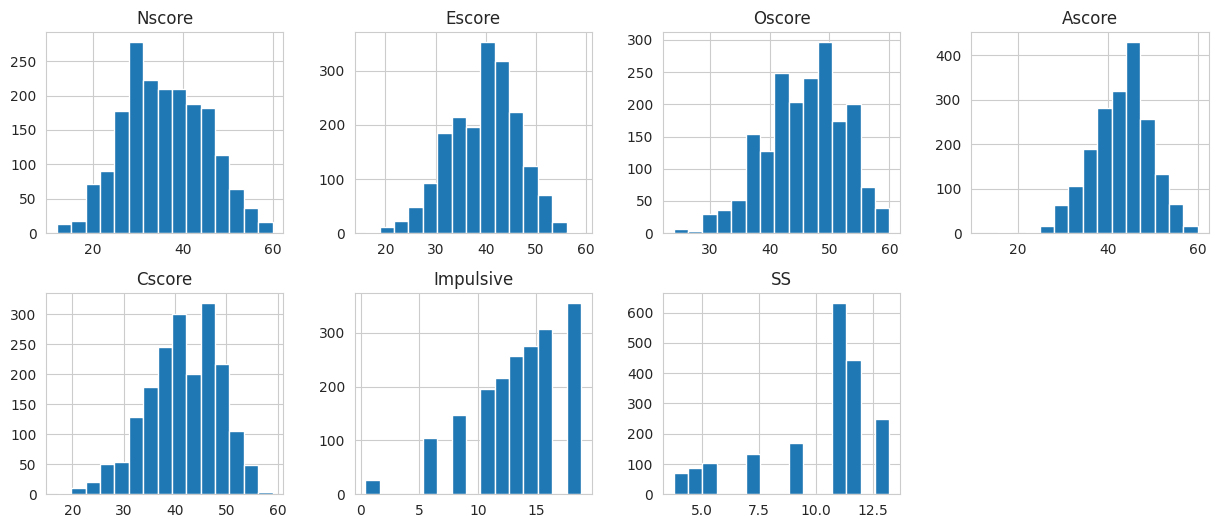

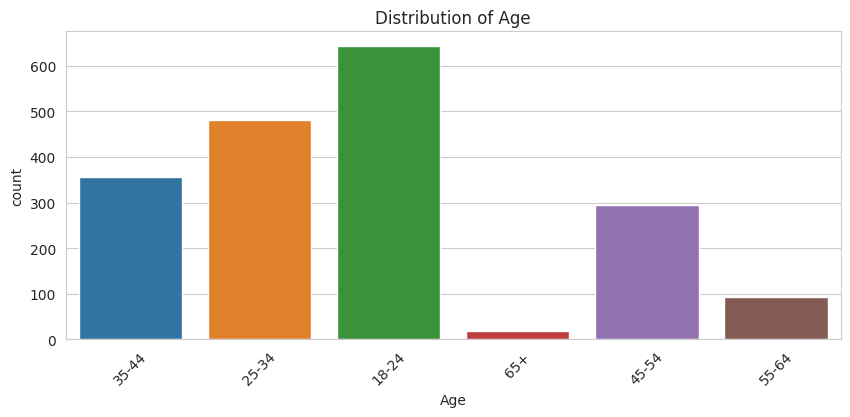

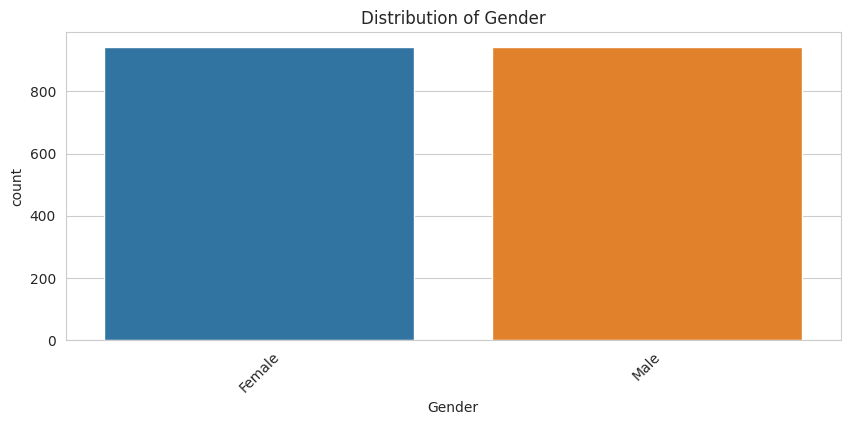

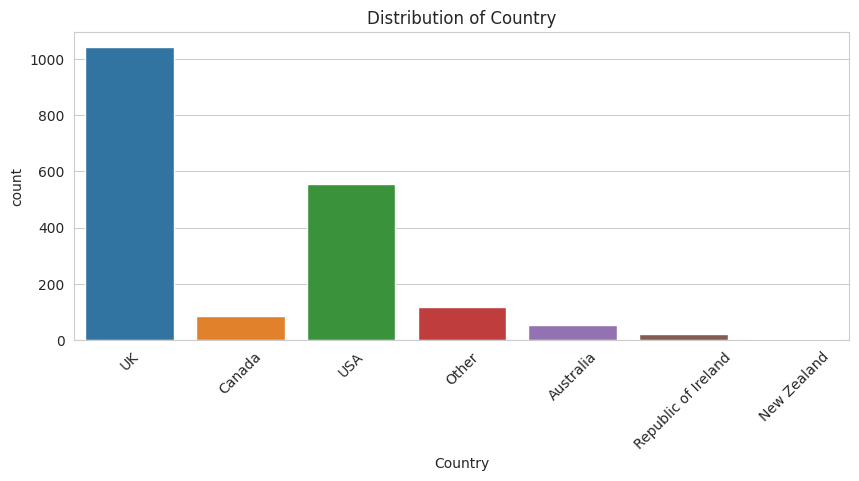

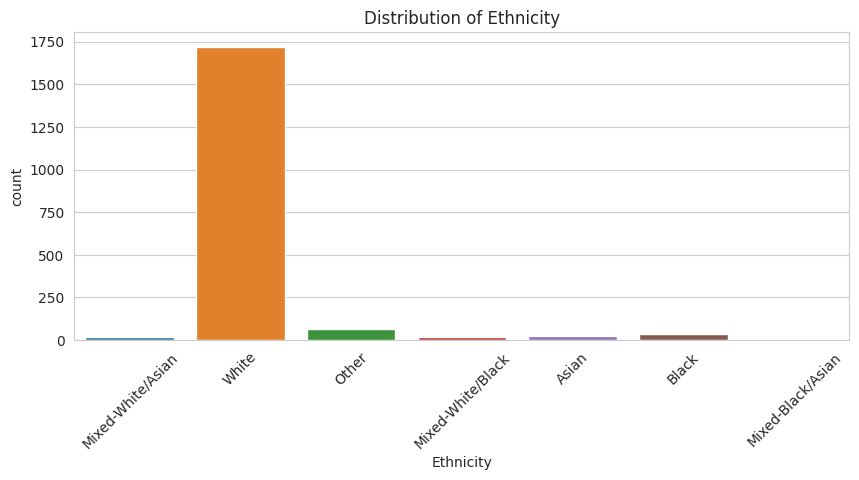

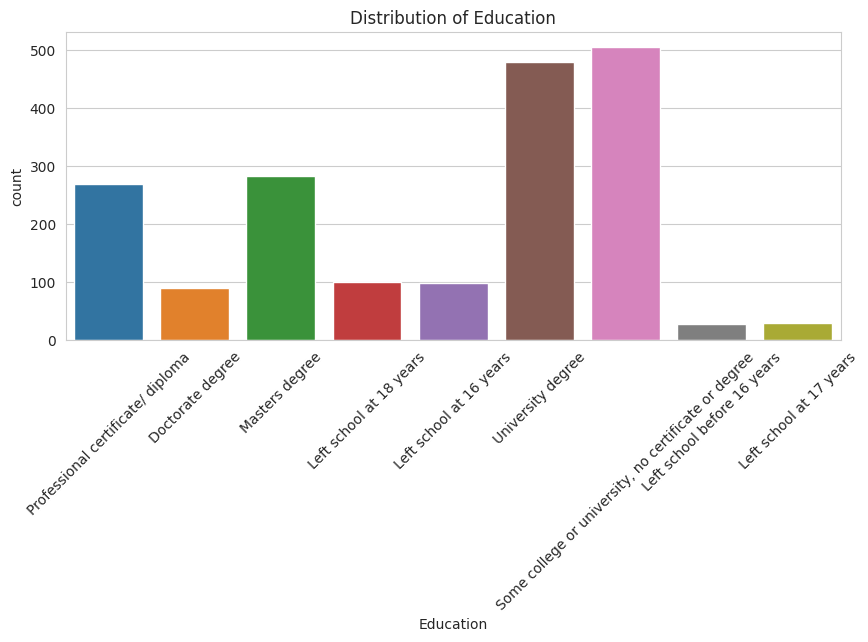

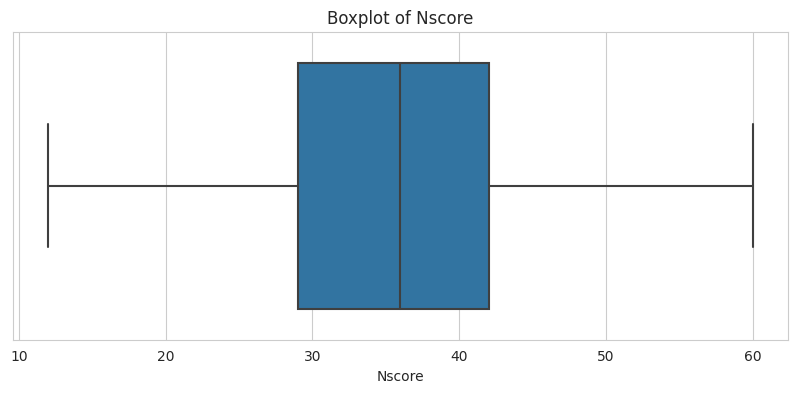

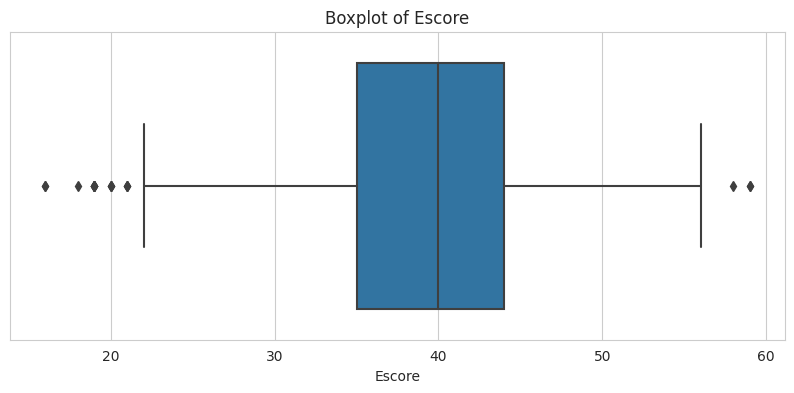

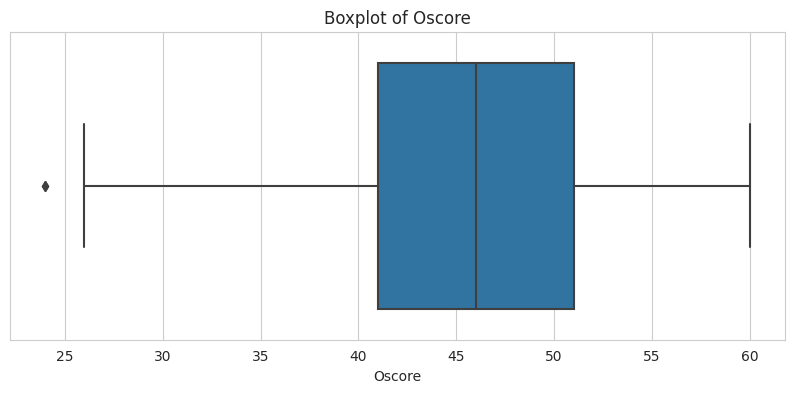

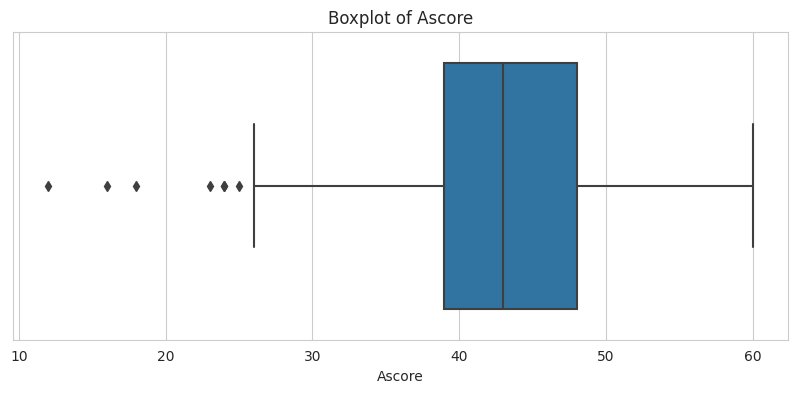

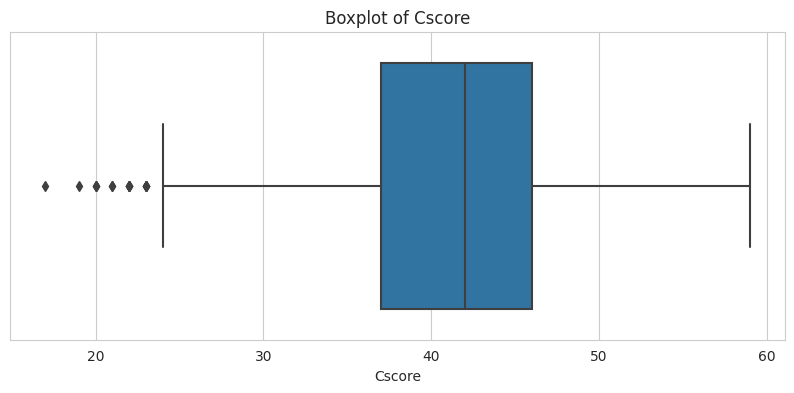

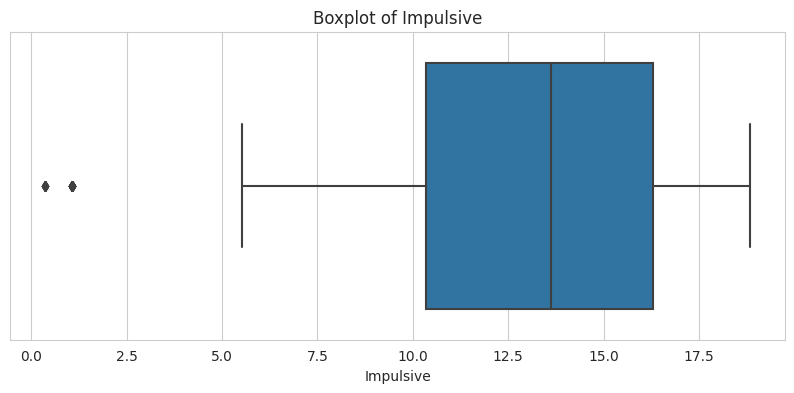

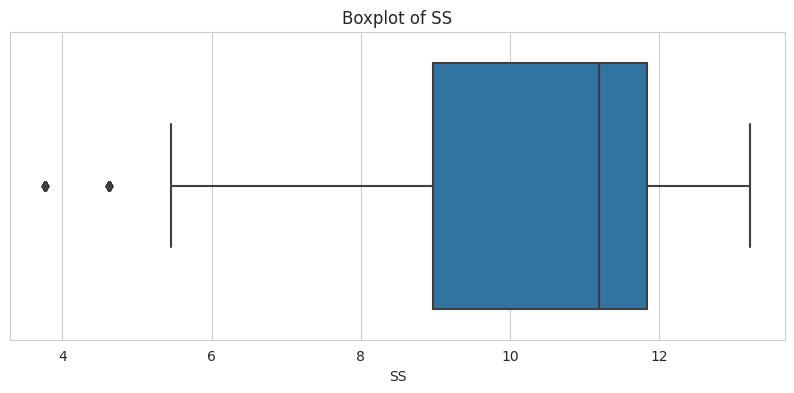

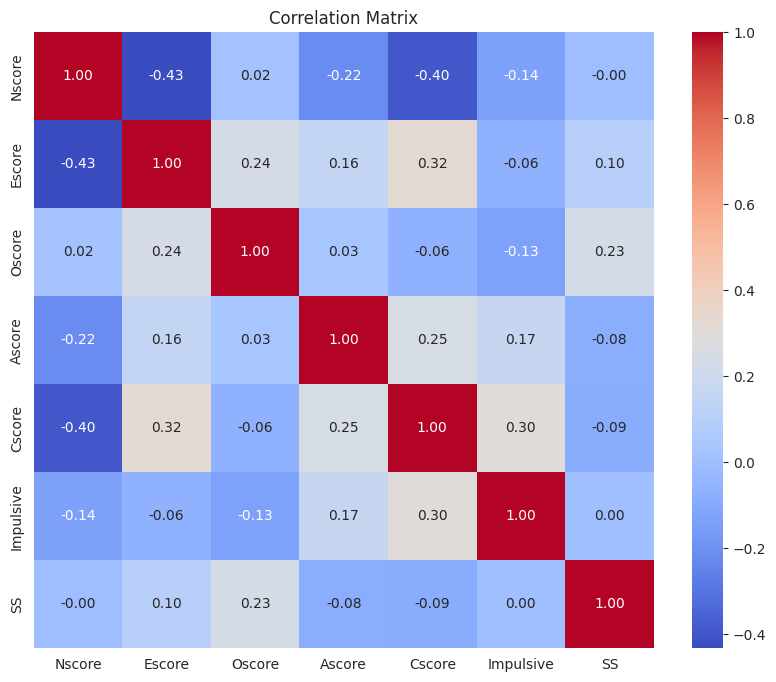

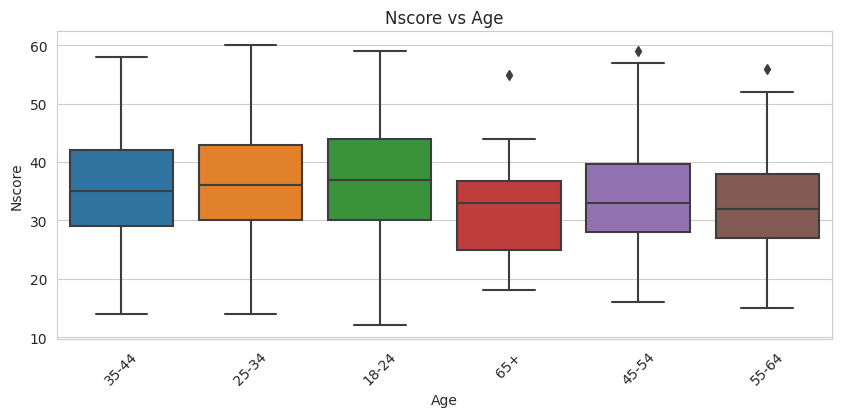

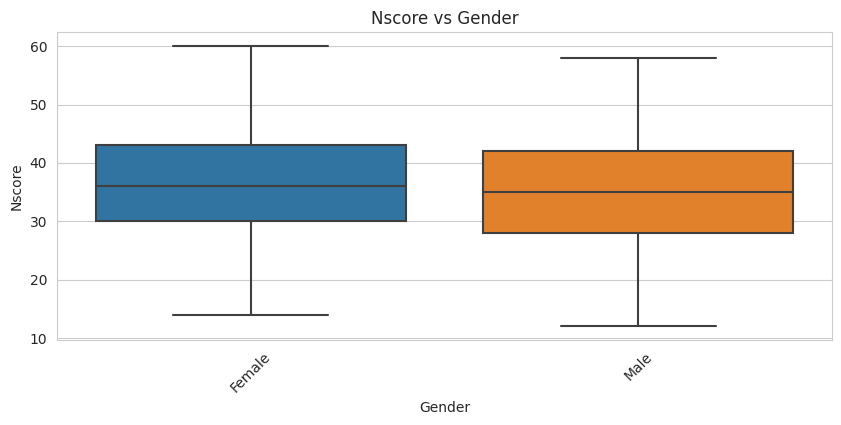

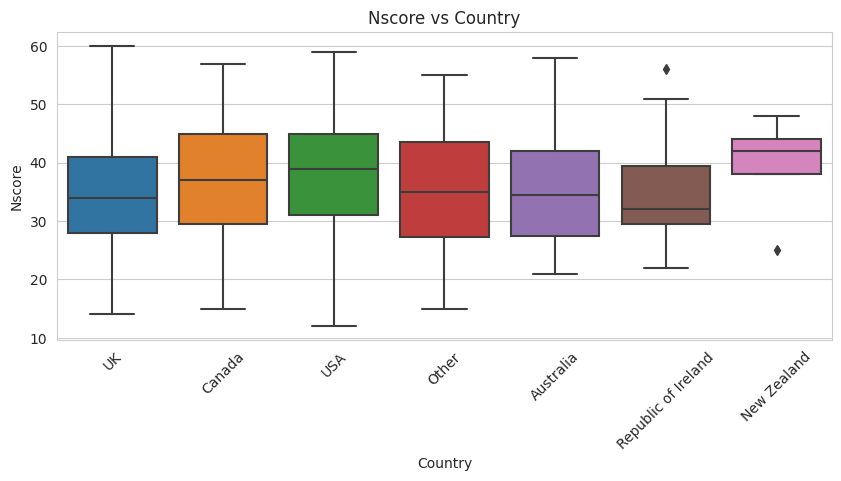

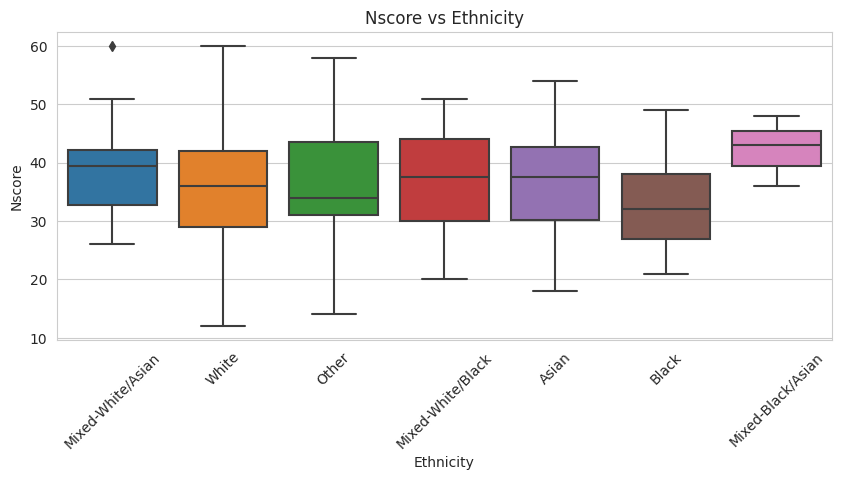

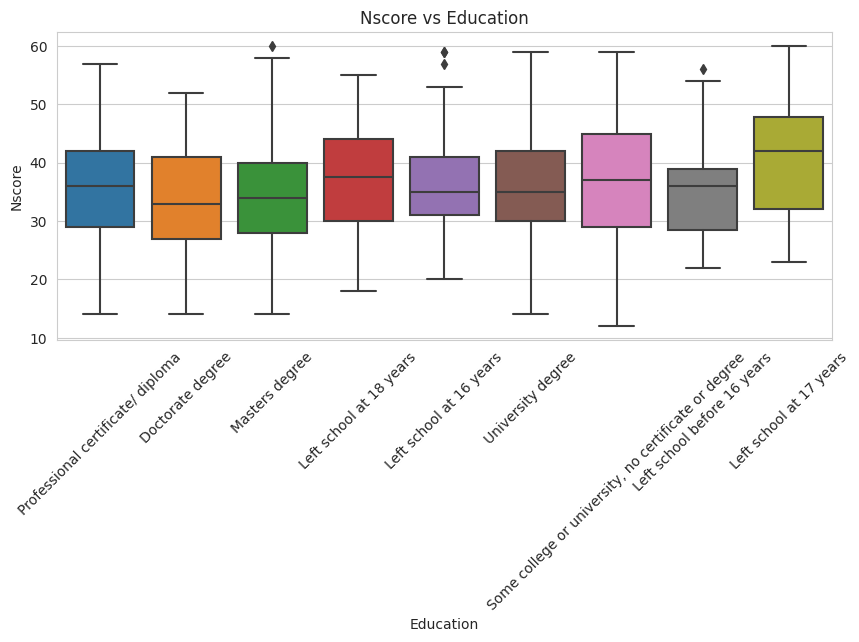

In [794]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Load the dataset
data = pd.read_csv('drug_consumptioncleaned.csv')

# 1. Basic Information
print(data.info())
print(data.describe())


# 3. Distribution of Categorical Features
categorical_columns = ['Age', 'Gender', 'Country', 'Ethnicity', 'Education']
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# 4. Boxplots for Numerical Features
for col in numeric_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=col, data=data)
    plt.title(f'Boxplot of {col}')
    plt.show()

# 5. Correlation Matrix of Numerical Features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 6. Pair Plot (Optional, might be heavy on large datasets)
# sns.pairplot(data[numeric_columns])
# plt.show()

# 7. Relationship between Categorical Features and a Specific Numerical Feature
# Replace 'Nscore' with the numerical feature you're interested in
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=col, y='Nscore', data=data)
    plt.title(f'Nscore vs {col}')
    plt.xticks(rotation=45)
    plt.show()

# Note: Modify the plots and analysis based on the specific requirements of your EDA.


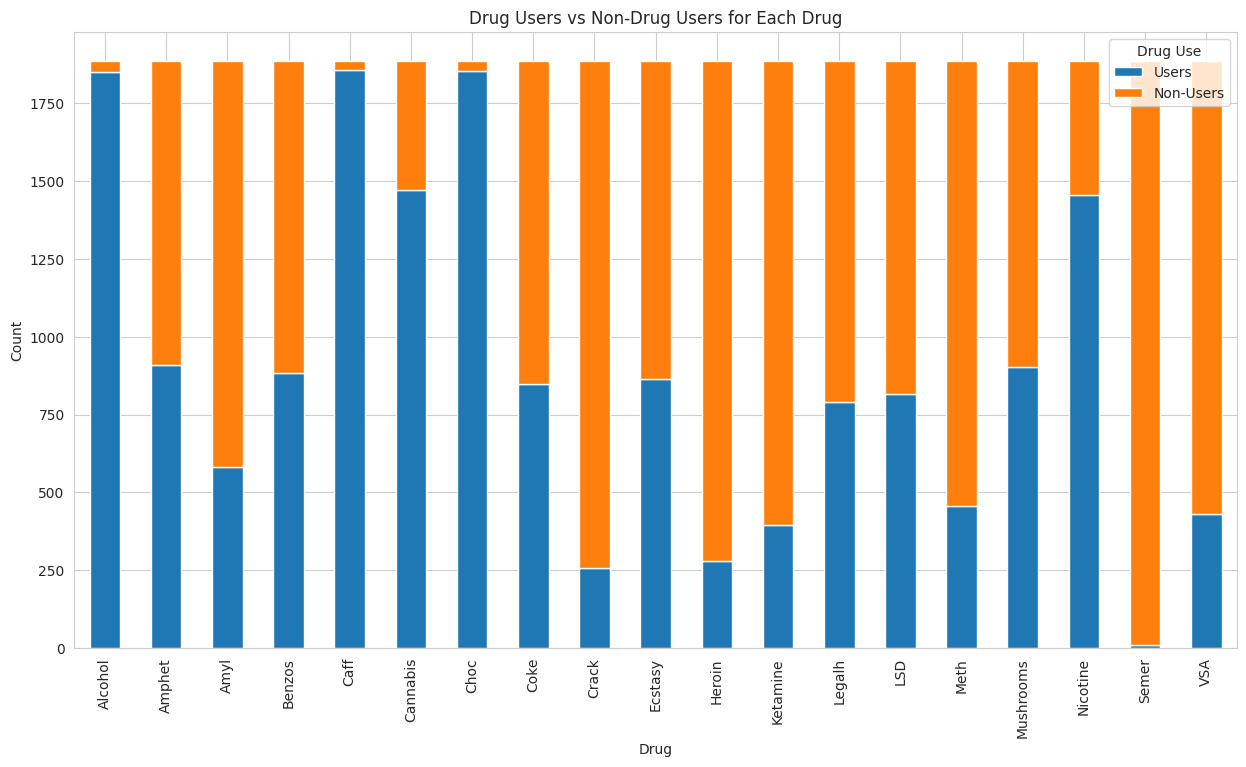

In [769]:
# Counting the number of users and non-users for each drug in the new list
new_drug_use_counts = {}
for col in new_drug_columns:
    new_drug_use_counts[col] = new_data[col].value_counts()

# Preparing new data for plotting
new_plot_data = {}
for drug, counts in new_drug_use_counts.items():
    user_count = counts.drop('CL0', errors='ignore').sum()
    non_user_count = counts.get('CL0', 0)
    new_plot_data[drug] = [user_count, non_user_count]

# Converting to DataFrame for easy plotting
new_plot_df = pd.DataFrame.from_dict(new_plot_data, orient='index', columns=['Users', 'Non-Users'])

# Plotting the new data
new_plot_df.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title("Drug Users vs Non-Drug Users for Each Drug")
plt.xlabel("Drug")
plt.ylabel("Count")
plt.legend(title="Drug Use")
plt.show()

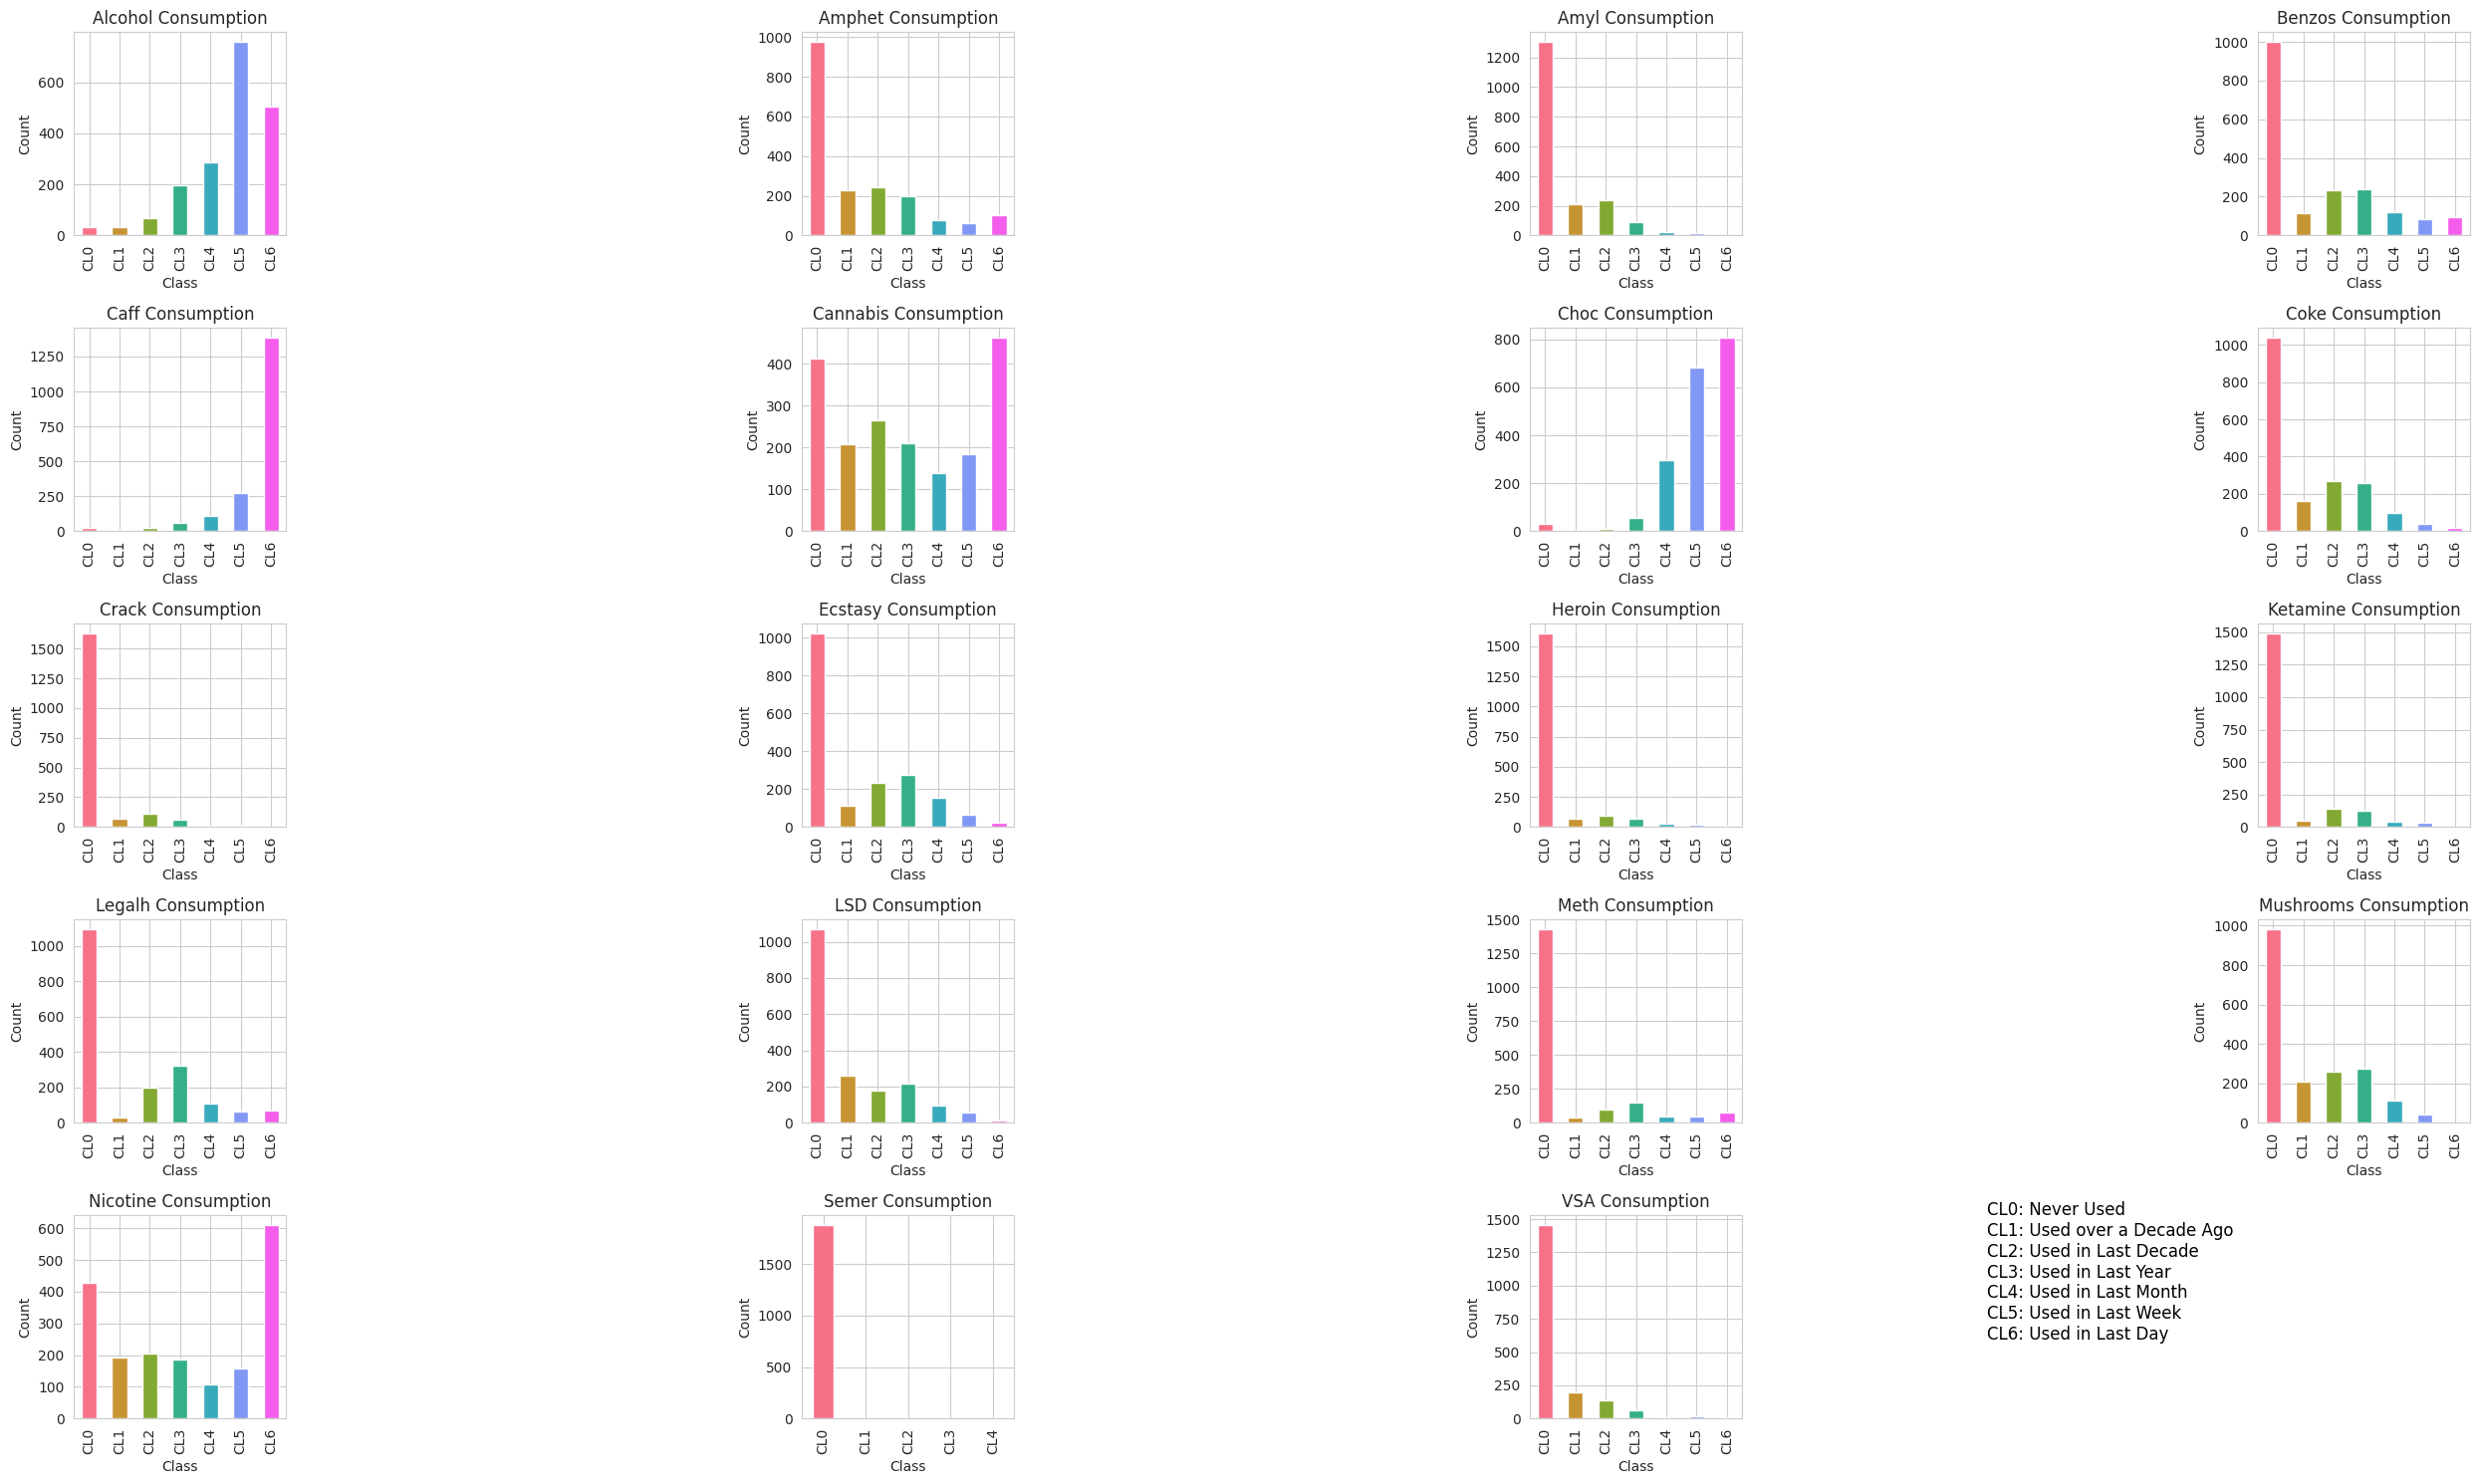

In [770]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up a color palette
colors = sns.color_palette('husl', 7)  # 7 colors for CL0 to CL6

# Setting up the figure for multiple subplots
plt.figure(figsize=(25, 15))

# Loop through each drug and create a subplot with additional details
for i, drug in enumerate(new_drug_columns, 1):
    plt.subplot(5, 4, i)
    # Get value counts and sort by index (CL)
    value_counts = new_data[drug].value_counts().sort_index()
    # Create a bar plot with the specified color palette
    value_counts.plot(kind='bar', color=colors)
    plt.title(f'{drug} Consumption')
    plt.xlabel('Class')
    plt.ylabel('Count')

# Add a text box for the legend in the empty space, outside the loop
legend_text = 'CL0: Never Used\nCL1: Used over a Decade Ago\nCL2: Used in Last Decade\nCL3: Used in Last Year\nCL4: Used in Last Month\nCL5: Used in Last Week\nCL6: Used in Last Day'
plt.text(0.8, 0.1, legend_text, fontsize=12, color='black', transform=plt.gcf().transFigure, ha='left')

# Adjust layout
plt.tight_layout()
plt.show()


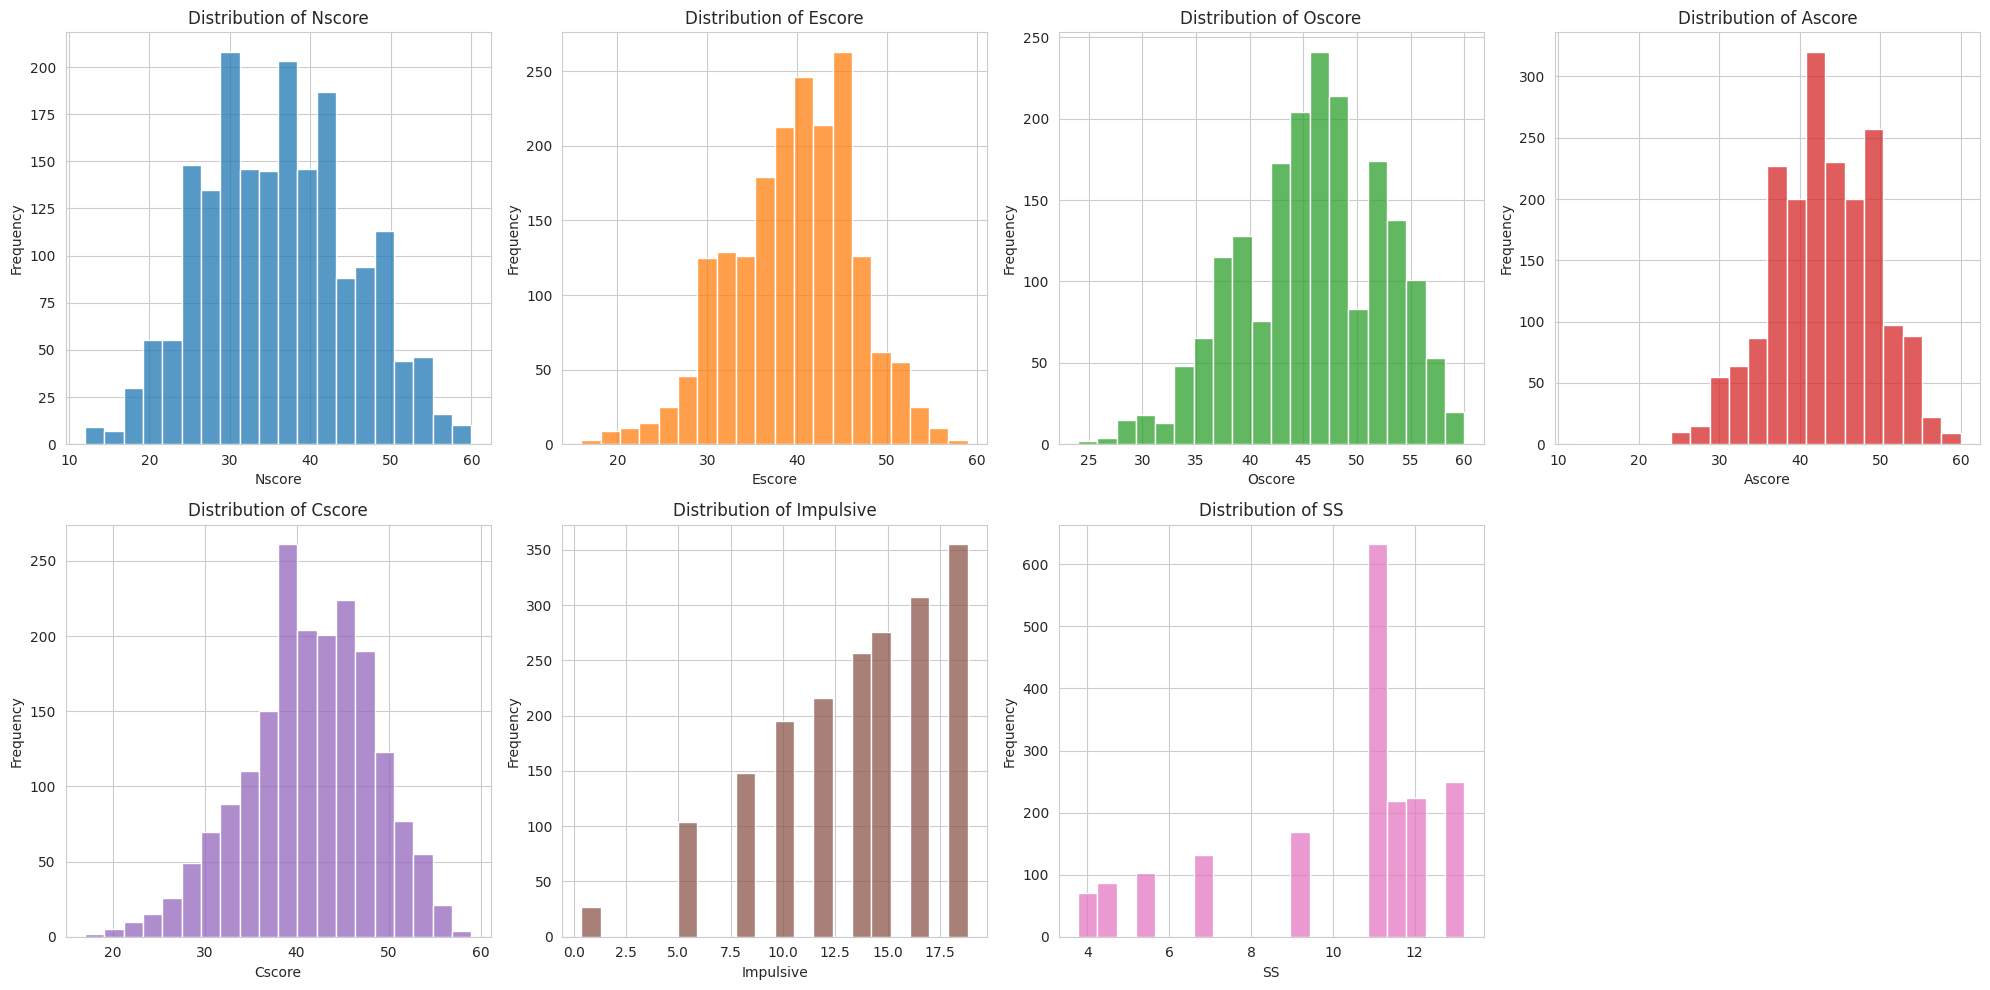

In [771]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir une palette de couleurs, une pour chaque trait de personnalité
colors = sns.color_palette('tab10', len(personality_traits))

# Configuration de la figure pour plusieurs sous-graphiques
plt.figure(figsize=(20, 10))

# Boucle pour chaque trait de personnalité et création d'un sous-graphique
for i, trait in enumerate(personality_traits, 1):
    plt.subplot(2, 4, i)
    sns.histplot(new_data[trait], kde=False, bins=20, color=colors[i-1])
    plt.title(f'Distribution of {trait}')
    plt.xlabel(trait)
    plt.ylabel('Frequency')

# Ajuster la disposition
plt.tight_layout()
plt.show()


For the analysis, we will select a few commonly known and widely studied drugs to explore their correlation with personality traits. Let's choose the following drugs for this analysis:

    Alcohol - as it's one of the most commonly consumed substances.
    Cannabis - often the subject of research and discussion regarding drug use.
    Cocaine - known for its potent effects and high potential for abuse.
    Ecstasy - a popular drug in certain social settings, like parties and nightclubs.
    Nicotine - a widely used substance, often discussed in public health contexts.

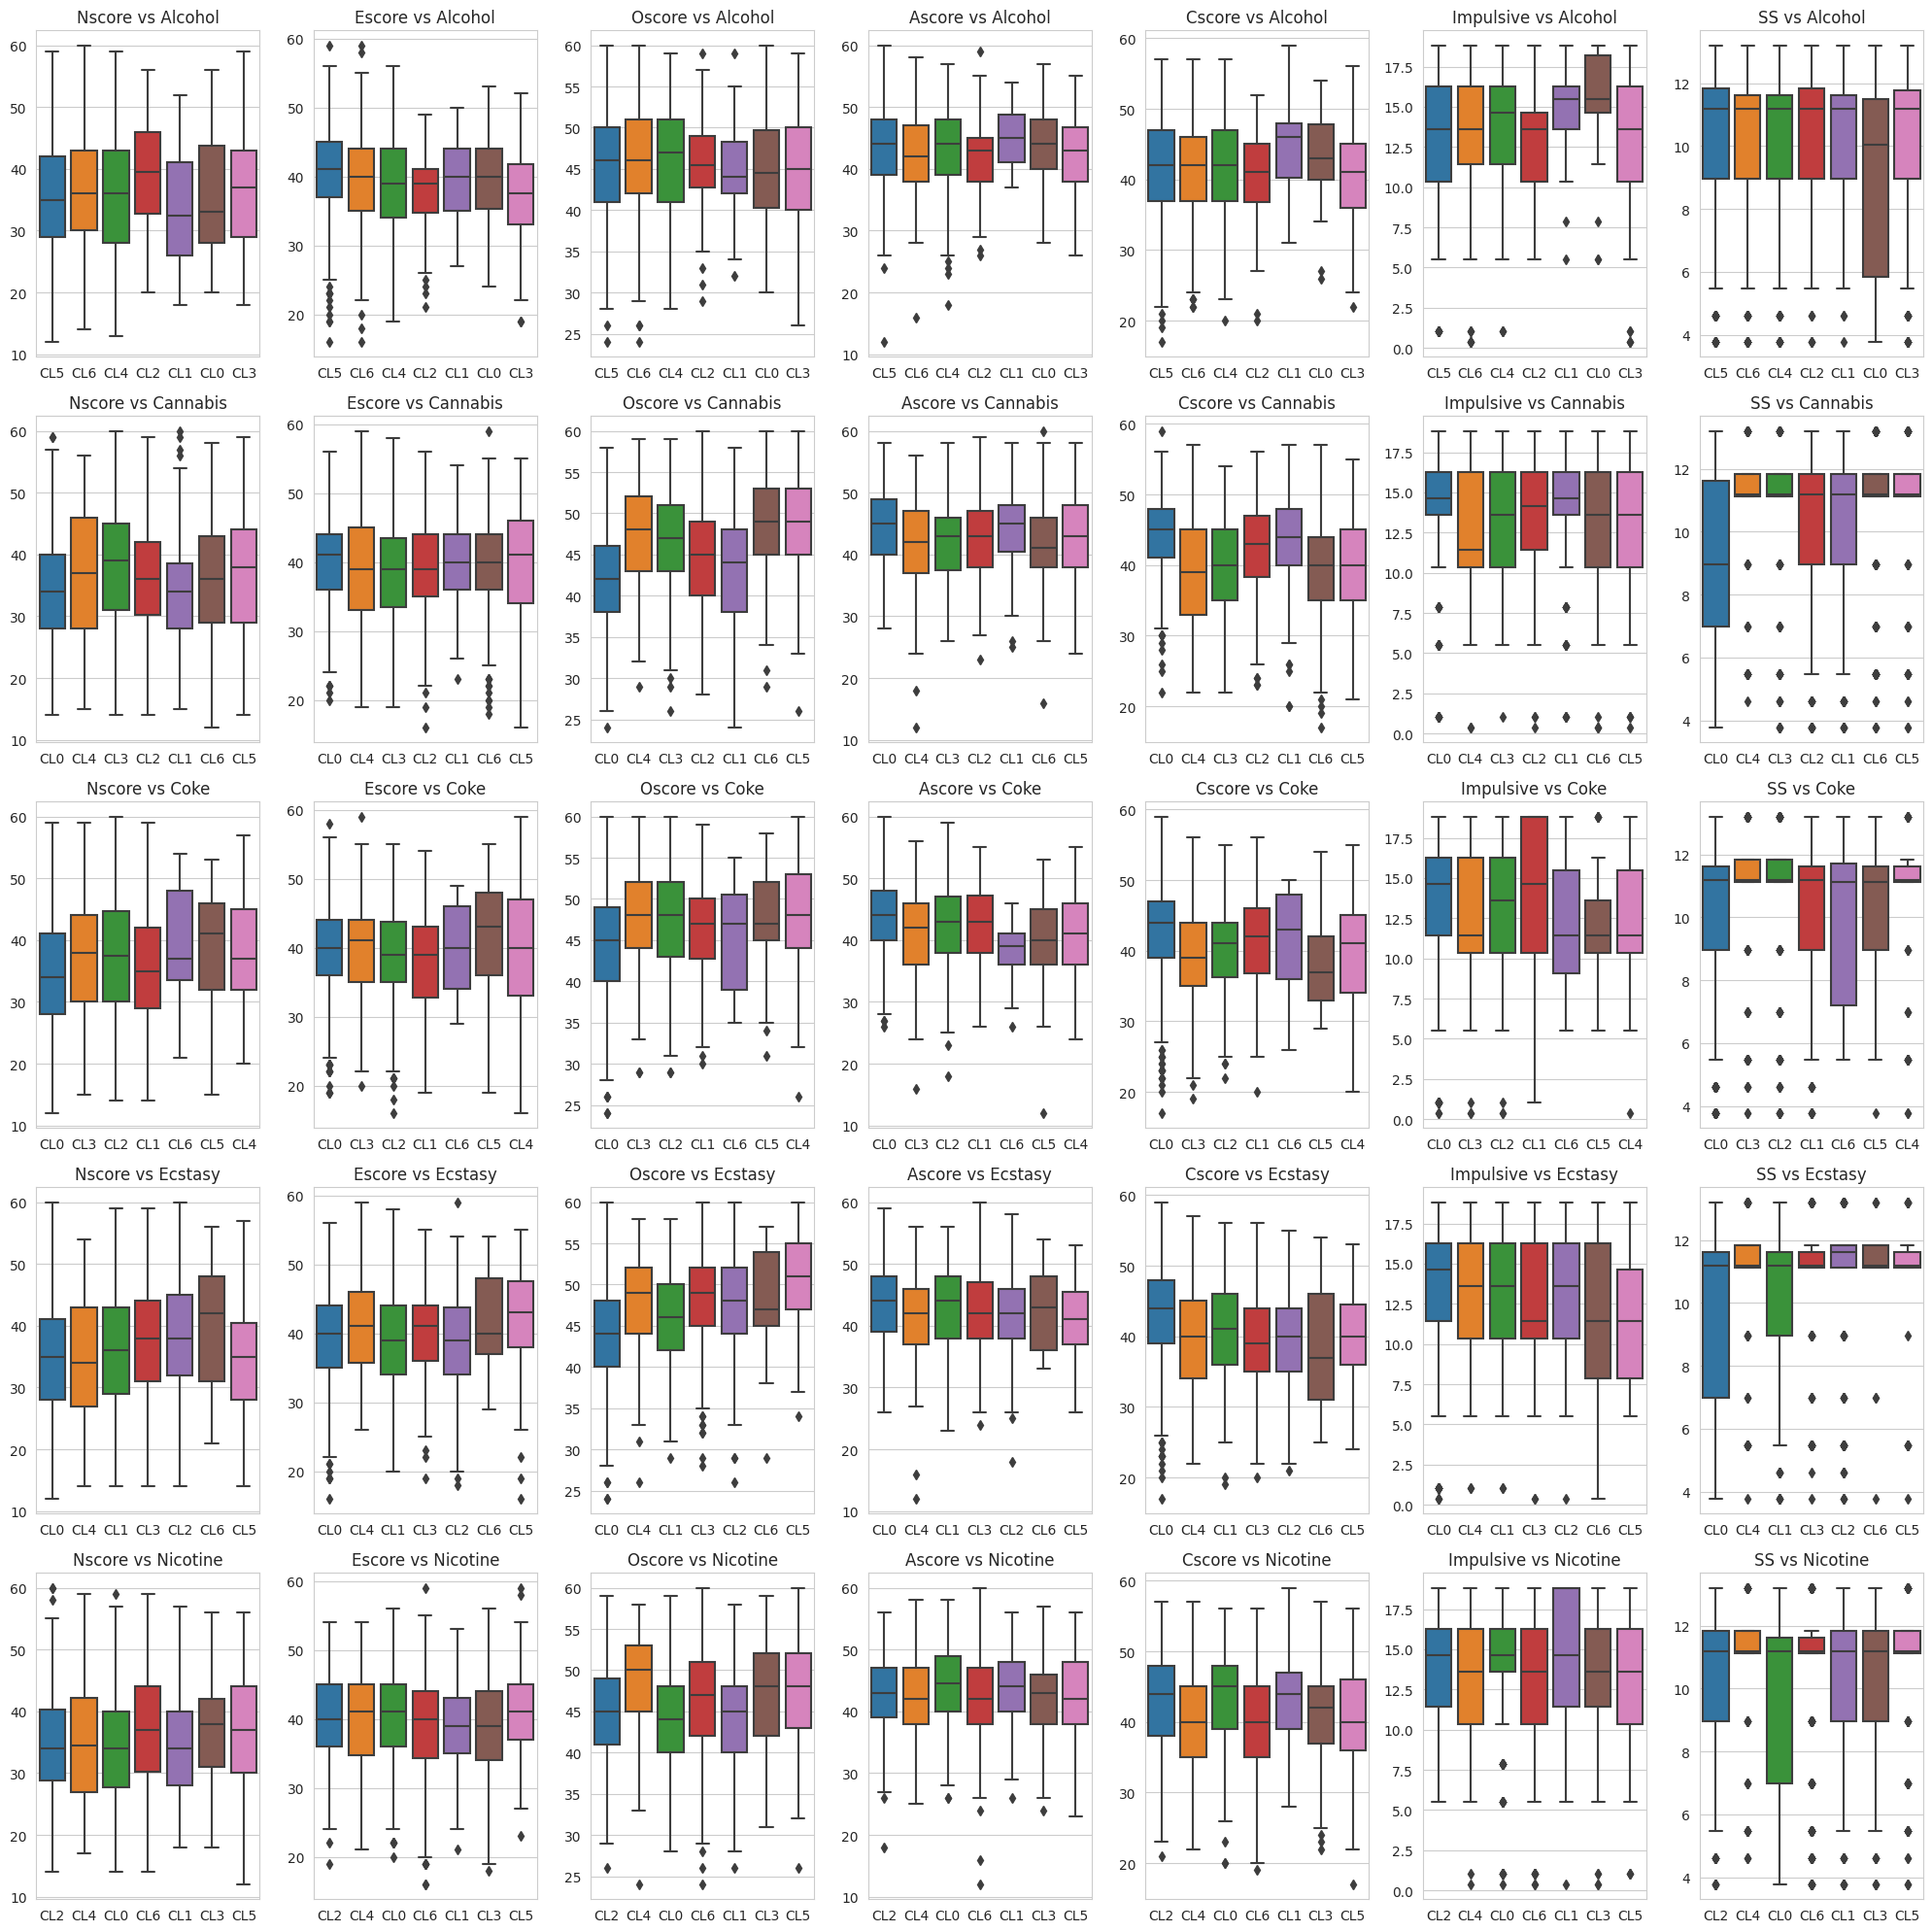

In [772]:
# Selected drugs for the analysis
selected_drugs = ['Alcohol', 'Cannabis', 'Coke', 'Ecstasy', 'Nicotine']

# Setting up the figure for multiple subplots
fig, axes = plt.subplots(len(selected_drugs), len(personality_traits), figsize=(20, 20))

# Loop through each drug and each personality trait to create box plots
for i, drug in enumerate(selected_drugs):
    for j, trait in enumerate(personality_traits):
        sns.boxplot(ax=axes[i, j], x=new_data[drug], y=new_data[trait])
        axes[i, j].set_title(f'{trait} vs {drug}')
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()


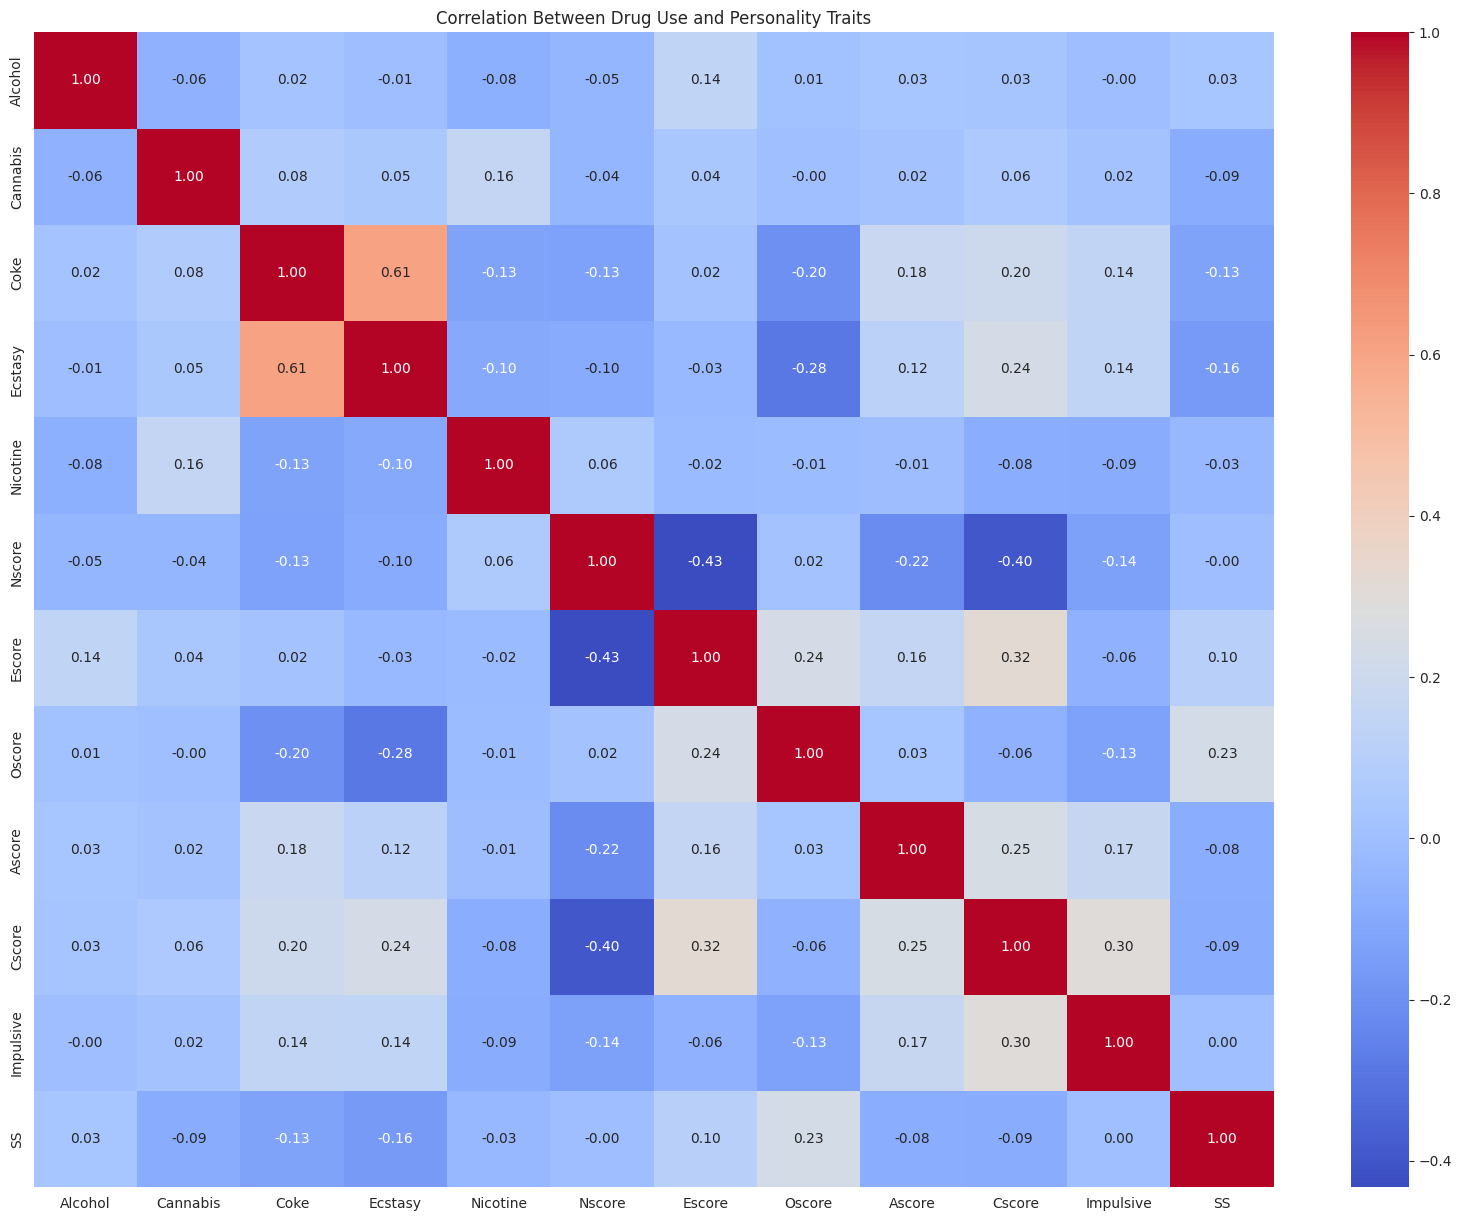

In [773]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns related to drugs and personality traits
drug_columns = ['Alcohol', 'Cannabis', 'Coke', 'Ecstasy', 'Nicotine']
personality_traits = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

# Creating a new dataframe with only the relevant columns
drugs_and_personality = data[drug_columns + personality_traits]

# Converting drug consumption columns to numeric values
conversion_dict = {f'CL{i}': i for i in range(7)}
drugs_and_personality.replace(conversion_dict, inplace=True)

# Calculate the correlation matrix
correlation_matrix = drugs_and_personality.corr()

# Plotting the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Between Drug Use and Personality Traits")
plt.show()


Neuroticism: This trait shows a variable correlation with drug use. Higher neuroticism might be linked with the use of certain drugs, potentially as a coping mechanism for stress or emotional challenges.

Openness to Experience: Individuals with higher scores in openness may be more likely to experiment with drugs, reflecting a broader willingness to explore new experiences.

Extraversion and Conscientiousness: These traits may show mixed correlations with drug use. Higher extraversion could be associated with social drug use, while higher conscientiousness might inversely relate to drug use, reflecting more cautious and disciplined behavior.

Differing Patterns Across Drugs: Different drugs have distinct correlation patterns with personality traits, indicating that the influence of personality on drug consumption can vary significantly depending on the substance.

In [774]:
new_data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,39,36,42,37,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,Male,Doctorate degree,UK,White,29,52,55,48,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,Male,Professional certificate/ diploma,UK,White,31,45,40,32,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,Masters degree,UK,White,34,34,46,47,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,Female,Doctorate degree,UK,White,43,28,43,41,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


## 5. Modélisation et analyse

Machine Learning

This section covers data cleaning, preprocessing, and preparation for analysis.

CL0 = Non-User

CL1-6 = User



**Modèle de logisticRegression pour prédire la consommation de certaines substances en fonction des caractéristiques des individus**

In [775]:
# Replace drug consumption categories with numeric values
for col in new_drug_columns:
    new_data[col] = new_data[col].replace({f'CL{i}': i for i in range(7)})

# Select personality traits columns
new_data[new_drug_columns].head()

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,0
1,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0
2,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0
3,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,0
4,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,0


In [776]:
import pandas as pd

# Replace drug consumption categories with numeric values
for col in new_drug_columns:
    new_data[col] = new_data[col].replace({f'CL{i}': i for i in range(7)})

# Binarize the drug consumption data: 0 stays as 0, everything else becomes 1
new_data[new_drug_columns] = new_data[new_drug_columns].applymap(lambda x: 0 if x == 0 else 1)

# Display the first few rows of the binarized drug columns
print(new_data[new_drug_columns].head())


   Alcohol  Amphet  Amyl  Benzos  Caff  Cannabis  Choc  Coke  Crack  Ecstasy  \
0        1       1     0       1     1         0     1     0      0        0   
1        1       1     1       0     1         1     1     1      0        1   
2        1       0     0       0     1         1     1     0      0        0   
3        1       0     0       1     1         1     1     1      0        0   
4        1       1     1       0     1         1     1     0      0        1   

   Heroin  Ketamine  Legalh  LSD  Meth  Mushrooms  Nicotine  Semer  VSA  
0       0         0       0    0     0          0         1      0    0  
1       0         1       0    1     1          0         1      0    0  
2       0         0       0    0     0          1         0      0    0  
3       0         1       0    0     0          0         1      0    0  
4       0         0       1    0     0          1         1      0    0  


In [777]:
from sklearn.preprocessing import LabelEncoder

# Creating a label encoder object
label_encoder = LabelEncoder()

# Columns to be label encoded
label_cols = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']

# Applying label encoding to each categorical column
for col in label_cols:
    new_data[col] = label_encoder.fit_transform(data[col])

# Checking the transformed data
new_data[label_cols].head()


,Age,Gender,Education,Country,Ethnicity
0,2,0,6,5,3
1,1,1,0,5,6
2,2,1,6,5,6
3,0,0,5,5,6
4,2,0,0,5,6


In [792]:
new_data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Mushrooms,Nicotine,Semer,VSA,Alcohol_cat,Cannabis_cat,Coke_cat,Ecstasy_cat,Nicotine_cat,Cluster
0,1,2,0,6,5,3,39,36,42,37,...,0,1,0,0,1,0,0,0,1,3
1,2,1,1,0,5,6,29,52,55,48,...,0,1,0,0,1,1,1,1,1,2
2,3,2,1,6,5,6,31,45,40,32,...,1,0,0,0,1,1,0,0,0,4
3,4,0,0,5,5,6,34,34,46,47,...,0,1,0,0,1,1,1,0,1,4
4,5,2,0,0,5,6,43,28,43,41,...,1,1,0,0,1,1,0,1,1,4


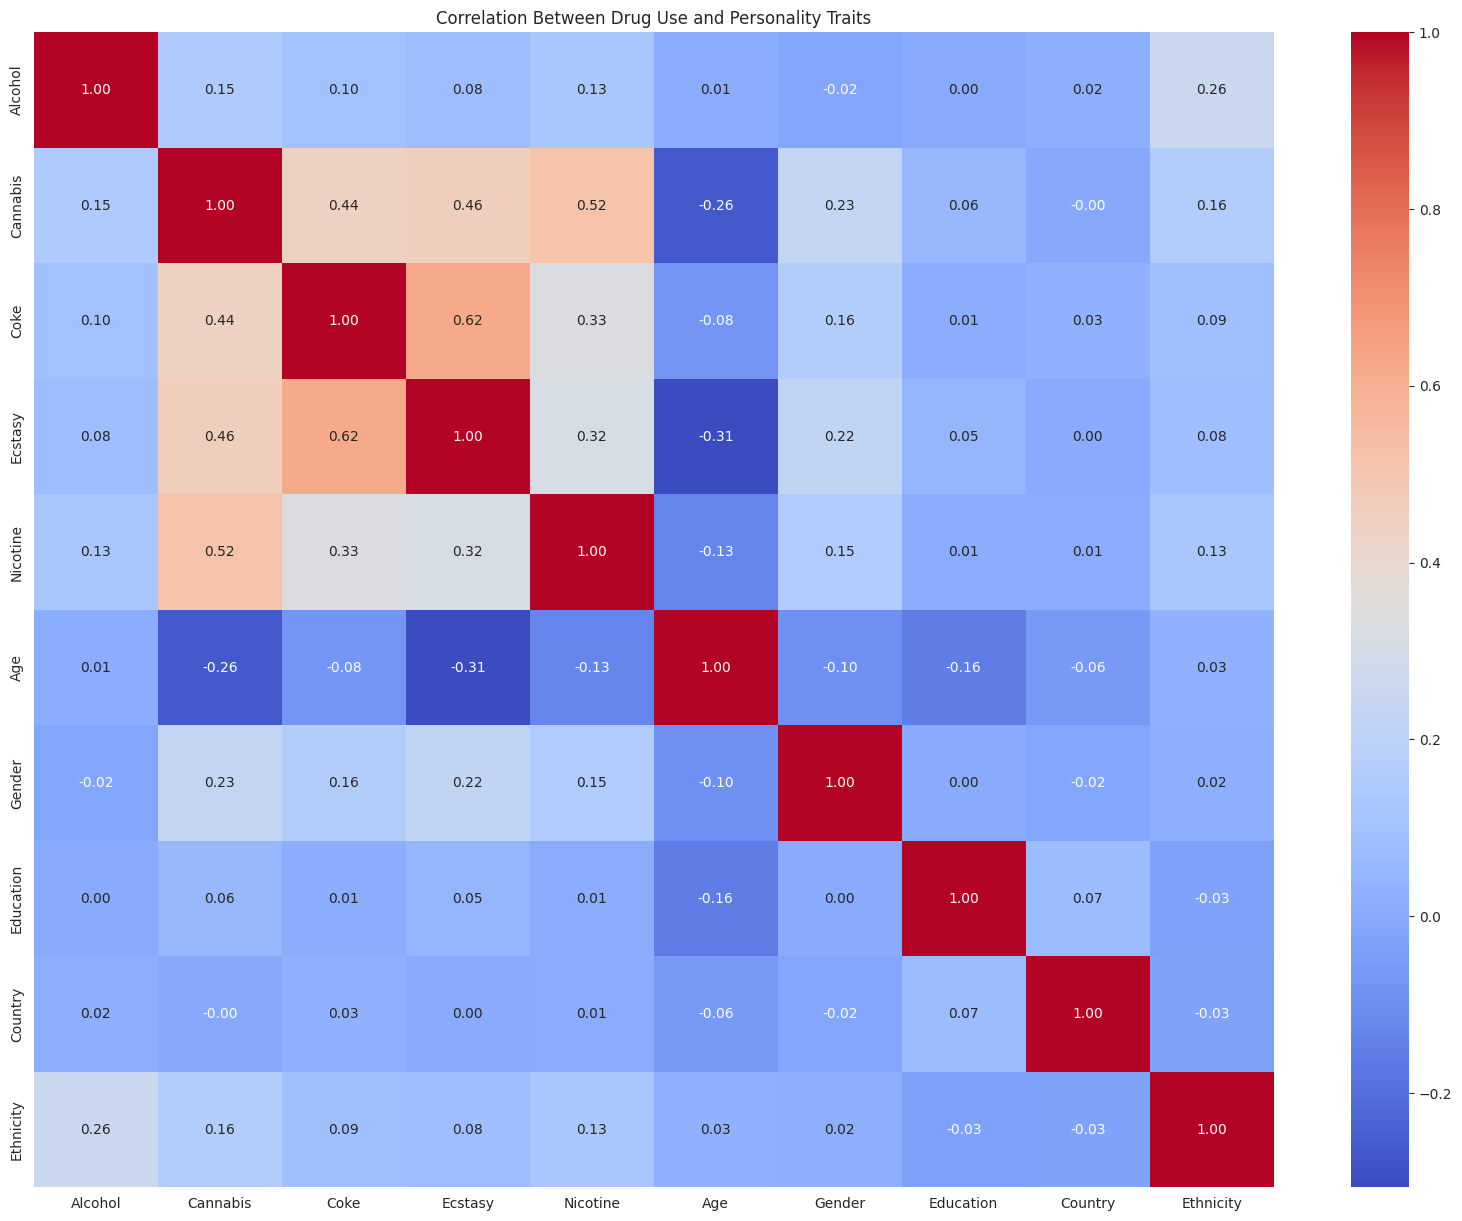

In [778]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns related to drugs and personality traits
new_drug_columns = ['Alcohol', 'Cannabis', 'Coke', 'Ecstasy', 'Nicotine']
label_cols = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']

# Creating a new dataframe with only the relevant columns
drugs_and_personality = new_data[new_drug_columns + label_cols]

# Converting drug consumption columns to numeric values
conversion_dict = {f'CL{i}': i for i in range(7)}
drugs_and_personality.replace(conversion_dict, inplace=True)

# Calculate the correlation matrix
correlation_matrix = drugs_and_personality.corr()

# Plotting the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Between Drug Use and Personality Traits")
plt.show()


## Logistic Regression Model

In [779]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Function to categorize consumption levels
def categorize_consumption(x):
    return 0 if x == 0 else 1

# Applying the categorization to the 'Alcohol' column
new_data['Alcohol_cat'] = new_data['Alcohol'].apply(categorize_consumption)

# Selecting features and target variable for alcohol consumption model
X = new_data[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]
y = new_data['Alcohol_cat']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and training the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Model is now trained, we can evaluate it on the test set
logistic_model.score(X_test_scaled, y_test)


0.9814323607427056

In [780]:
# Function to train and evaluate a logistic regression model for a given substance
def train_and_evaluate_model(data, substance_name):
    # Categorizing consumption levels
    new_data[substance_name + '_cat'] = new_data[substance_name].apply(categorize_consumption)

    # Selecting target variable
    y_substance = new_data[substance_name + '_cat']

    # Splitting the data
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y_substance, test_size=0.2, random_state=42)

    # Standardizing the features
    X_train_sub_scaled = scaler.fit_transform(X_train_sub)
    X_test_sub_scaled = scaler.transform(X_test_sub)

    # Creating and training the logistic regression model
    logistic_model_sub = LogisticRegression()
    logistic_model_sub.fit(X_train_sub_scaled, y_train_sub)

    # Evaluating the model
    return logistic_model_sub.score(X_test_sub_scaled, y_test_sub)


In [781]:
# Correcting the substance names and retraining the models
substances = ['Cannabis', 'Coke', 'Ecstasy', 'Nicotine']

# Training and evaluating models for each corrected substance name
for substance in substances:
  print(train_and_evaluate_model(new_data,substance))


0.7771883289124668
0.610079575596817
0.6551724137931034
0.7612732095490716


Function to create logisticRegression model for a given substance

In [782]:
def train_and_evaluate_logistic_model(X,y):
    # Splitting the data
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y_substance, test_size=0.2, random_state=42)

    # Standardizing the features
    X_train_sub_scaled = scaler.fit_transform(X_train_sub)
    X_test_sub_scaled = scaler.transform(X_test_sub)

    # Creating and training the logistic regression model
    logistic_model_sub = LogisticRegression()
    logistic_model_sub.fit(X_train_sub_scaled, y_train_sub)

    # Evaluating the model
    return logistic_model

**Clusthering en fonction des traits de personnalités et la consommation des drogues selectionnées**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



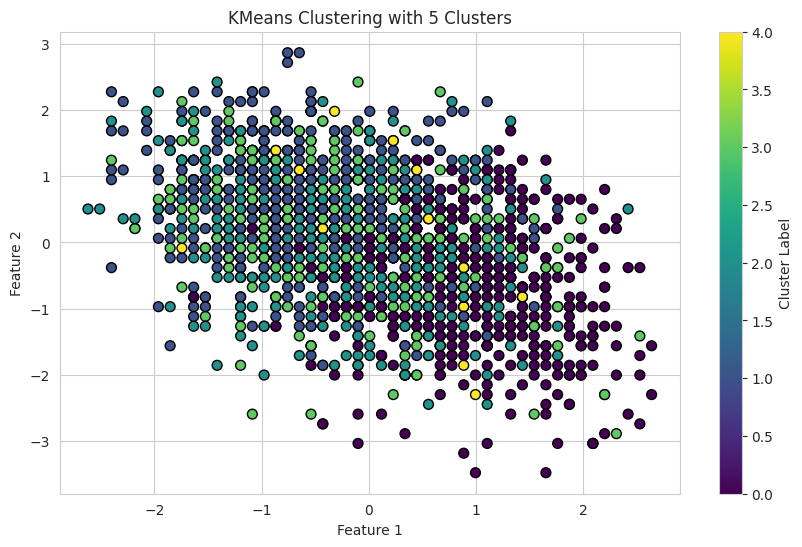

In [783]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to perform KMeans clustering and plot the results
def kmeans_clustering(new_data, n_clusters):
    # Applying KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(new_data)

    # Plotting the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(new_data[:, 0], new_data[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.title(f'KMeans Clustering with {n_clusters} Clusters')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

    return clusters

# Selecting personality traits and substance consumption levels
features_for_clustering = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS',
                           'Alcohol_cat', 'Cannabis_cat', 'Coke_cat', 'Ecstasy_cat', 'Nicotine_cat']

# Standardizing these features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data[features_for_clustering])

# Applying KMeans Clustering - Let's start with an arbitrary choice of 3 clusters
clusters = kmeans_clustering(data_scaled, 5)


In [784]:
# Calculating the mean values for each cluster
new_data['Cluster'] = clusters
cluster_means = new_data.groupby('Cluster')[features_for_clustering].mean()

cluster_means

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol_cat,Cannabis_cat,Coke_cat,Ecstasy_cat,Nicotine_cat
Cluster,,,,,,,,,,,,
0,44.416486,34.865510,46.214751,39.013015,34.290672,11.217896,10.518134,1.0,0.989154,0.765727,0.746204,0.947939
1,31.924953,43.080675,49.350844,43.834897,43.181989,13.720544,10.885084,1.0,0.988743,0.810507,0.915572,0.923077
2,33.848421,39.633684,44.658947,43.844211,43.589474,14.525221,10.153705,1.0,1.000000,0.109474,0.044211,0.795789
3,33.903141,40.282723,41.649215,44.869110,44.835079,14.622147,8.984503,1.0,0.007853,0.018325,0.013089,0.358639
4,35.029412,39.764706,45.000000,43.764706,42.735294,15.027059,8.822353,0.0,0.323529,0.088235,0.176471,0.382353


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



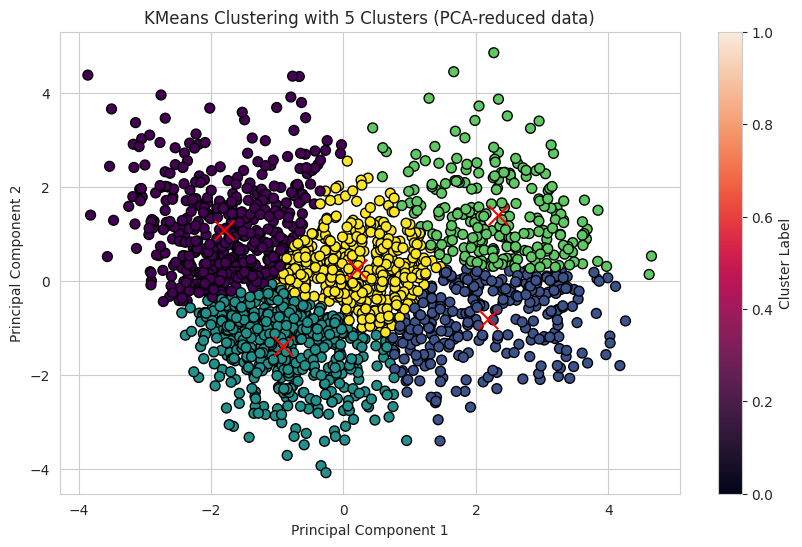

In [785]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Function to perform KMeans clustering and plot the results
def kmeans_clustering_improved(new_data, n_clusters):
    # Standardizing the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(new_data)

    # Reducing data to 2D using PCA
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data_scaled)

    # Applying KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data_pca)

    # Plotting the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200)
    plt.title(f'KMeans Clustering with {n_clusters} Clusters (PCA-reduced data)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

    return clusters

# Example usage
clusters = kmeans_clustering_improved(new_data[features_for_clustering], 5)


In [786]:
# Calculating the mean values for each cluster
new_data['Cluster'] = clusters
cluster_means = new_data.groupby('Cluster')[features_for_clustering].mean()

cluster_means

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol_cat,Cannabis_cat,Coke_cat,Ecstasy_cat,Nicotine_cat
Cluster,,,,,,,,,,,,
0,44.253863,34.677704,46.322296,38.843267,34.406181,11.438852,10.588543,0.997792,0.995585,0.794702,0.779249,0.962472
1,28.249135,44.276817,44.079585,47.141869,47.896194,15.194325,9.899965,0.975779,0.394464,0.020761,0.027682,0.498270
2,31.353175,44.019841,50.015873,44.303571,43.396825,13.435774,11.054385,0.998016,0.996032,0.777778,0.839286,0.960317
3,37.930041,36.176955,39.489712,43.584362,42.580247,14.581317,7.689588,0.913580,0.139918,0.012346,0.012346,0.288066
4,36.570707,38.179293,44.785354,42.078283,41.570707,14.123005,10.373687,0.989899,0.936869,0.217172,0.194444,0.815657


Analyse des Clusters

    Cluster 0 :
        Traits de personnalité : Hautes valeurs de Nscore (névrotisme), faibles valeurs d'Escore (extraversion) et de Cscore (conscience).
        Consommation de substances : Haute consommation de Cannabis, Cocaïne, Ecstasy et Nicotine. Alcool catégorisé comme consommateur.
        Interprétation : Ce cluster semble représenter des individus avec des traits de névrotisme élevés et une faible extraversion, qui ont tendance à consommer une variété de substances, notamment le Cannabis, la Cocaïne, l'Ecstasy et la Nicotine.

    Cluster 1 :
        Traits de personnalité : Valeurs moyennement basses de Nscore, valeurs neutres à légèrement positives d'Escore.
        Consommation de substances : Très faible consommation de toutes les substances, y compris l'Alcool.
        Interprétation : Ce cluster semble inclure des individus avec un faible névrotisme et une extraversion modérée, ayant une faible consommation de substances.

    Cluster 2 :
        Traits de personnalité : Faibles valeurs de Nscore, hautes valeurs d'Escore (extraversion) et d'Oscore (ouverture).
        Consommation de substances : Haute consommation de Cannabis, Cocaïne, Ecstasy et Nicotine. Alcool catégorisé comme consommateur.
        Interprétation : Ce cluster peut représenter des individus extravertis et ouverts, ayant tendance à une consommation élevée de plusieurs substances.

    Cluster 3 :
        Traits de personnalité : Valeurs moyennes de Nscore, Escore, et Ascore.
        Consommation de substances : Consommation modérée de Cannabis, faible consommation d'autres substances.
        Interprétation : Ce cluster semble correspondre à des individus avec des traits de personnalité équilibrés, ayant une consommation modérée de Cannabis mais généralement une faible consommation d'autres substances.

    Cluster 4 :
        Traits de personnalité : Valeurs moyennement basses de Nscore, valeurs neutres d'Escore et de Cscore.
        Consommation de substances : Haute consommation de Cannabis, consommation modérée de Nicotine, faible consommation d'autres substances.
        Interprétation : Ce cluster semble indiquer des individus avec un faible névrotisme, consommant principalement du Cannabis et de la Nicotine, mais moins d'autres substances.

**Modèle de réseau de Neurones pour la Consommation des substances :

nous limitons ici, à 500 le  nombre d'itération max, afin de rendre plus rapide l'execution du code.
en remplacant max_iter=500 par max_iter=1000, l'optimization converge.

In [787]:
from sklearn.neural_network import MLPClassifier

# Function to create and evaluate a neural network model for a given substance
def create_and_evaluate_nn_model(X, y):
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardizing the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Creating and training the neural network model
    nn_model = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=500, random_state=42)
    nn_model.fit(X_train_scaled, y_train)

    # Evaluating the model
    return nn_model.score(X_test_scaled, y_test)

# Preparing the features (traits de personnalité)
X = new_data[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]

# Creating and evaluating models for each substance
substances = ['Alcohol', 'Cannabis', 'Coke', 'Ecstasy', 'Nicotine']
nn_accuracies = {}

for substance in substances:
    y_substance = new_data[substance + '_cat']
    nn_accuracies[substance] = create_and_evaluate_nn_model(X, y_substance)

nn_accuracies



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



{'Alcohol': 0.9787798408488063,
 'Cannabis': 0.7161803713527851,
 'Coke': 0.5994694960212201,
 'Ecstasy': 0.6339522546419099,
 'Nicotine': 0.6816976127320955}

Function to create and evaluate a neural network model for a given *substance*

In [788]:
def create_and_evaluate_nn_model(X, y):
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardizing the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Creating and training the neural network model
    nn_model = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=500, random_state=42)
    nn_model.fit(X_train_scaled, y_train)

    # Returning the trained model, not the accuracy
    return nn_model

*Exemple d'utilisation des deux méthodes d'utilisation (LogisticRegression & Neurone) : *

*Neuronnal : *

In [789]:
# Preparing the features (traits de personnalité)
X = new_data[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]

# Creating and evaluating models for each substance
substances = ['Alcohol', 'Cannabis', 'Coke', 'Ecstasy', 'Nicotine']
nn_models = {}

for substance in substances:
    y_substance = new_data[substance + '_cat']
    nn_models[substance] = create_and_evaluate_nn_model(X, y_substance)
    joblib.dump(nn_models[substance], substance+'_nn.joblib')

# Modified prediction function
def predict_substances_nn(nscore, escore, oscore, ascore, cscore, impulsive, ss, models):
    predictions = {}

    # Créer un DataFrame avec les données du nouvel individu
    nouvel_individu = pd.DataFrame({
        'Nscore': [nscore],
        'Escore': [escore],
        'Oscore': [oscore],
        'Ascore': [ascore],
        'Cscore': [cscore],
        'Impulsive': [impulsive],
        'SS': [ss]
    })

    # Sélectionner les caractéristiques du nouvel individu
    X_nouvel_individu = nouvel_individu[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]

    # Standardiser les caractéristiques du nouvel individu en utilisant le même scaler que celui utilisé pour l'ensemble d'entraînement
    scaler = StandardScaler()
    X_nouvel_individu_scaled = scaler.fit_transform(X_nouvel_individu)

    # Prédire la consommation pour chaque substance
    for substance, model in models.items():
        prediction = model.predict(X_nouvel_individu_scaled)
        predictions[substance] = prediction[0]

    return predictions

# Exemple d'utilisation avec les modèles de consommation des cinq substances
nscore = 25
escore = 20
oscore = 15
ascore = 30
cscore = 35
impulsive = 5
ss = 40
result = predict_substances_nn(nscore, escore, oscore, ascore, cscore, impulsive, ss, nn_models)
print("Prédiction de consommation pour le nouvel individu :")
for substance, prediction in result.items():
    print(f"{substance}: {prediction}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



Prédiction de consommation pour le nouvel individu :
Alcohol: 1
Cannabis: 1
Coke: 1
Ecstasy: 0
Nicotine: 1


nous limitons ici, à 500 le  nombre d'itération max, afin de rendre plus rapide l'execution du code.
en remplacant max_iter=500 par max_iter=1000, l'optimization converge.

*LogisticRegression : *

In [790]:
# Preparing the features (traits de personnalité)
X = new_data[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]

# Creating and evaluating models for each substance
substances = ['Alcohol', 'Cannabis', 'Coke', 'Ecstasy', 'Nicotine']
logistic_models = {}

for substance in substances:
    y_substance = new_data[substance + '_cat']
    logistic_models[substance] = train_and_evaluate_logistic_model(X, y_substance)
    joblib.dump(logistic_models[substance], substance+'_logistic.joblib')

# Modified prediction function
def predict_substances_logistic(nscore, escore, oscore, ascore, cscore, impulsive, ss, model):
    predictions = {}
    # Créer un DataFrame avec les données du nouvel individu
    nouvel_individu = pd.DataFrame({
        'Nscore': [nscore],
        'Escore': [escore],
        'Oscore': [oscore],
        'Ascore': [ascore],
        'Cscore': [cscore],
        'Impulsive': [impulsive],
        'SS': [ss]
    })

    # Sélectionner les caractéristiques du nouvel individu
    X_nouvel_individu = nouvel_individu[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]

    # Standardiser les caractéristiques du nouvel individu en utilisant le même scaler que celui utilisé pour l'ensemble d'entraînement
    scaler = StandardScaler()
    X_nouvel_individu_scaled = scaler.fit_transform(X_nouvel_individu)

    # Prédire la consommation pour chaque substance
    for substance, model in logistic_models.items():
        prediction = model.predict(X_nouvel_individu_scaled)
        predictions[substance] = prediction[0]

    return predictions

# Exemple d'utilisation avec le modèle de consommation d'alcool
nscore = 25
escore = 20
oscore = 15
ascore = 30
cscore = 35
impulsive = 5
ss = 40

result = predict_substances_nn(nscore, escore, oscore, ascore, cscore, impulsive, ss, logistic_models)
print("Prédiction de consommation pour le nouvel individu :")
for substance, prediction in result.items():
    print(f"{substance}: {prediction}")

Prédiction de consommation pour le nouvel individu :
Alcohol: 1
Cannabis: 1
Coke: 1
Ecstasy: 1
Nicotine: 1


nous limitons ici, à 500 le  nombre d'itération max, afin de rendre plus rapide l'execution du code.
en remplacant max_iter=500 par max_iter=1000, l'optimization converge.

In [793]:
new_data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Mushrooms,Nicotine,Semer,VSA,Alcohol_cat,Cannabis_cat,Coke_cat,Ecstasy_cat,Nicotine_cat,Cluster
0,1,2,0,6,5,3,39,36,42,37,...,0,1,0,0,1,0,0,0,1,3
1,2,1,1,0,5,6,29,52,55,48,...,0,1,0,0,1,1,1,1,1,2
2,3,2,1,6,5,6,31,45,40,32,...,1,0,0,0,1,1,0,0,0,4
3,4,0,0,5,5,6,34,34,46,47,...,0,1,0,0,1,1,1,0,1,4
4,5,2,0,0,5,6,43,28,43,41,...,1,1,0,0,1,1,0,1,1,4


### Streamlit

In [791]:
import streamlit as st
import pandas as pd
import plotly.express as px

selected_drug = st.selectbox('Choisissez une drogue pour l\'observation:', new_drug_columns)

# Filtrage des données en fonction de la drogue sélectionnée
filtered_data = new_data[selected_drug]

# Création du graphique
fig = px.histogram(filtered_data, x=selected_drug, title=f'Distribution de {selected_drug}')
st.plotly_chart(fig)


ModuleNotFoundError: ignored

In [ ]:
# Chargement des modèles pré-entraînés
# Assurez-vous que les modèles sont sauvegardés au format .joblib ou .pkl
models = {
    "Alcohol": joblib.load("Alcohol_nn.joblib"),
    "Cannabis": joblib.load("Cannabis_nn.joblib"),
    # Ajoutez d'autres modèles ici
}

# Interface pour saisir les caractéristiques de l'utilisateur
st.sidebar.title("Caractéristiques de l'Utilisateur")
nscore = st.sidebar.slider("Nscore", -3.0, 3.0, 0.0)
escore = st.sidebar.slider("Escore", -3.0, 3.0, 0.0)
oscore = st.sidebar.slider("Oscore", -3.0, 3.0, 0.0)
ascore = st.sidebar.slider("Ascore", -3.0, 3.0, 0.0)
cscore = st.sidebar.slider("Cscore", -3.0, 3.0, 0.0)
impulsive = st.sidebar.slider("Impulsive", -3.0, 3.0, 0.0)
ss = st.sidebar.slider("SS", -3.0, 3.0, 0.0)

# Fonction pour faire des prédictions
def predict_consumption(models, features):
    predictions = {}
    for substance, model in models.items():
        prediction = model.predict([features])
        predictions[substance] = prediction[0]
    return predictions

# Bouton pour effectuer les prédictions
if st.button("Prédire la consommation"):
    features = [nscore, escore, oscore, ascore, cscore, impulsive, ss]
    predictions = predict_consumption(models, features)
    st.write(predictions)
